In [43]:
pip install mylib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import sys
sys.path.append('/content/mylib')

In [ ]:
!mv data_preprocessing.py mylib

In [46]:
import argparse
import pandas as pd
import numpy as np
import drive.MyDrive.SignLanguageRecognitionbasedonposeestimatemaster.mylib.data_preprocessing as dpp

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.utils import np_utils, plot_model
from keras.models import load_model

from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam, SGD
from keras.layers import LeakyReLU

from enum import Enum
import matplotlib.pyplot as plt
from keras.callbacks import Callback, ModelCheckpoint
import itertools
from sklearn.metrics import confusion_matrix

In [47]:
raw_data = pd.read_csv('/content/drive/MyDrive/Sign-Language-Recognition-based-on-2D-pose-estimate-master/skeleton_data/train_16.csv', header=0)
dataset = raw_data.values
X = dataset[:, 0:20].astype(float)
Y = dataset[:, 20]
dataset.shape

(12800, 21)

In [48]:
raw_data

,joints[0]_x,joints[0]_y,joints[1]_x,joints[1]_y,joints[2]_x,joints[2]_y,joints[3]_x,joints[3]_y,joints[4]_x,joints[4]_y,...,joints[5]_y,joints[6]_x,joints[6]_y,joints[7]_x,joints[7]_y,joints[8]_x,joints[8]_y,joints[11]_x,joints[11]_y,class
0,0.597222,0.157609,0.601852,0.304348,0.532407,0.304348,0.504630,0.451087,0.486111,0.581522,...,0.304348,0.703704,0.478261,0.708333,0.619565,0.546296,0.614130,0.643519,0.635870,0
1,0.597222,0.157609,0.601852,0.304348,0.532407,0.304348,0.504630,0.451087,0.486111,0.581522,...,0.304348,0.703704,0.478261,0.708333,0.619565,0.546296,0.614130,0.643519,0.635870,0
2,0.583333,0.168478,0.597222,0.309783,0.523148,0.309783,0.504630,0.451087,0.476852,0.581522,...,0.309783,0.689815,0.483696,0.699074,0.619565,0.537037,0.635870,0.638889,0.663043,0
3,0.569444,0.184783,0.583333,0.320652,0.518519,0.320652,0.495370,0.472826,0.476852,0.581522,...,0.315217,0.680556,0.483696,0.685185,0.614130,0.537037,0.619565,0.629630,0.630435,0
4,0.569444,0.184783,0.583333,0.320652,0.518519,0.320652,0.495370,0.472826,0.476852,0.581522,...,0.315217,0.680556,0.483696,0.685185,0.614130,0.537037,0.619565,0.629630,0.630435,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,0.587963,0.092391,0.578704,0.271739,0.467593,0.260870,0.518519,0.369565,0.629630,0.440217,...,0.282609,0.703704,0.407609,0.555556,0.298913,0.509259,0.695652,0.662037,0.706522,15
12796,0.587963,0.092391,0.574074,0.271739,0.467593,0.260870,0.504630,0.358696,0.625000,0.429348,...,0.288043,0.708333,0.413043,0.550926,0.298913,0.504630,0.695652,0.657407,0.711957,15
12797,0.587963,0.092391,0.578704,0.277174,0.472222,0.260870,0.481481,0.347826,0.620370,0.423913,...,0.288043,0.717593,0.418478,0.550926,0.304348,0.504630,0.695652,0.662037,0.706522,15
12798,0.587963,0.092391,0.578704,0.271739,0.476852,0.255435,0.486111,0.353261,0.620370,0.429348,...,0.288043,0.722222,0.418478,0.550926,0.309783,0.513889,0.701087,0.657407,0.701087,15


In [49]:
print(X[0])
print(X[0][0])
for i in range(X.shape[0]):
    for n in range(20):
        if (n%2) == 0:
            X[i][n] = X[i][n] * 720
        else:
            X[i][n] = X[i][n] * 640

[0.59722222 0.1576087  0.60185185 0.30434783 0.53240741 0.30434783
 0.50462963 0.45108696 0.48611111 0.58152174 0.67592593 0.30434783
 0.7037037  0.47826087 0.70833333 0.61956522 0.5462963  0.61413043
 0.64351852 0.63586957]
0.597222222


float64


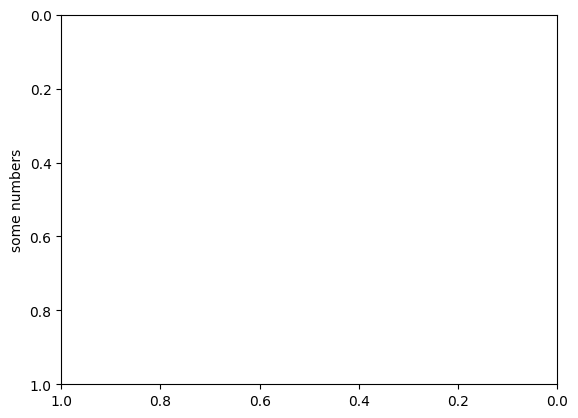

In [50]:
a = X[0]
print(a[0].dtype)
plt.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]])
plt.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]])
plt.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]])

plt.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]], [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs')

plt.axis([1, 0, 1, 0])
plt.ylabel('some numbers')
plt.show()

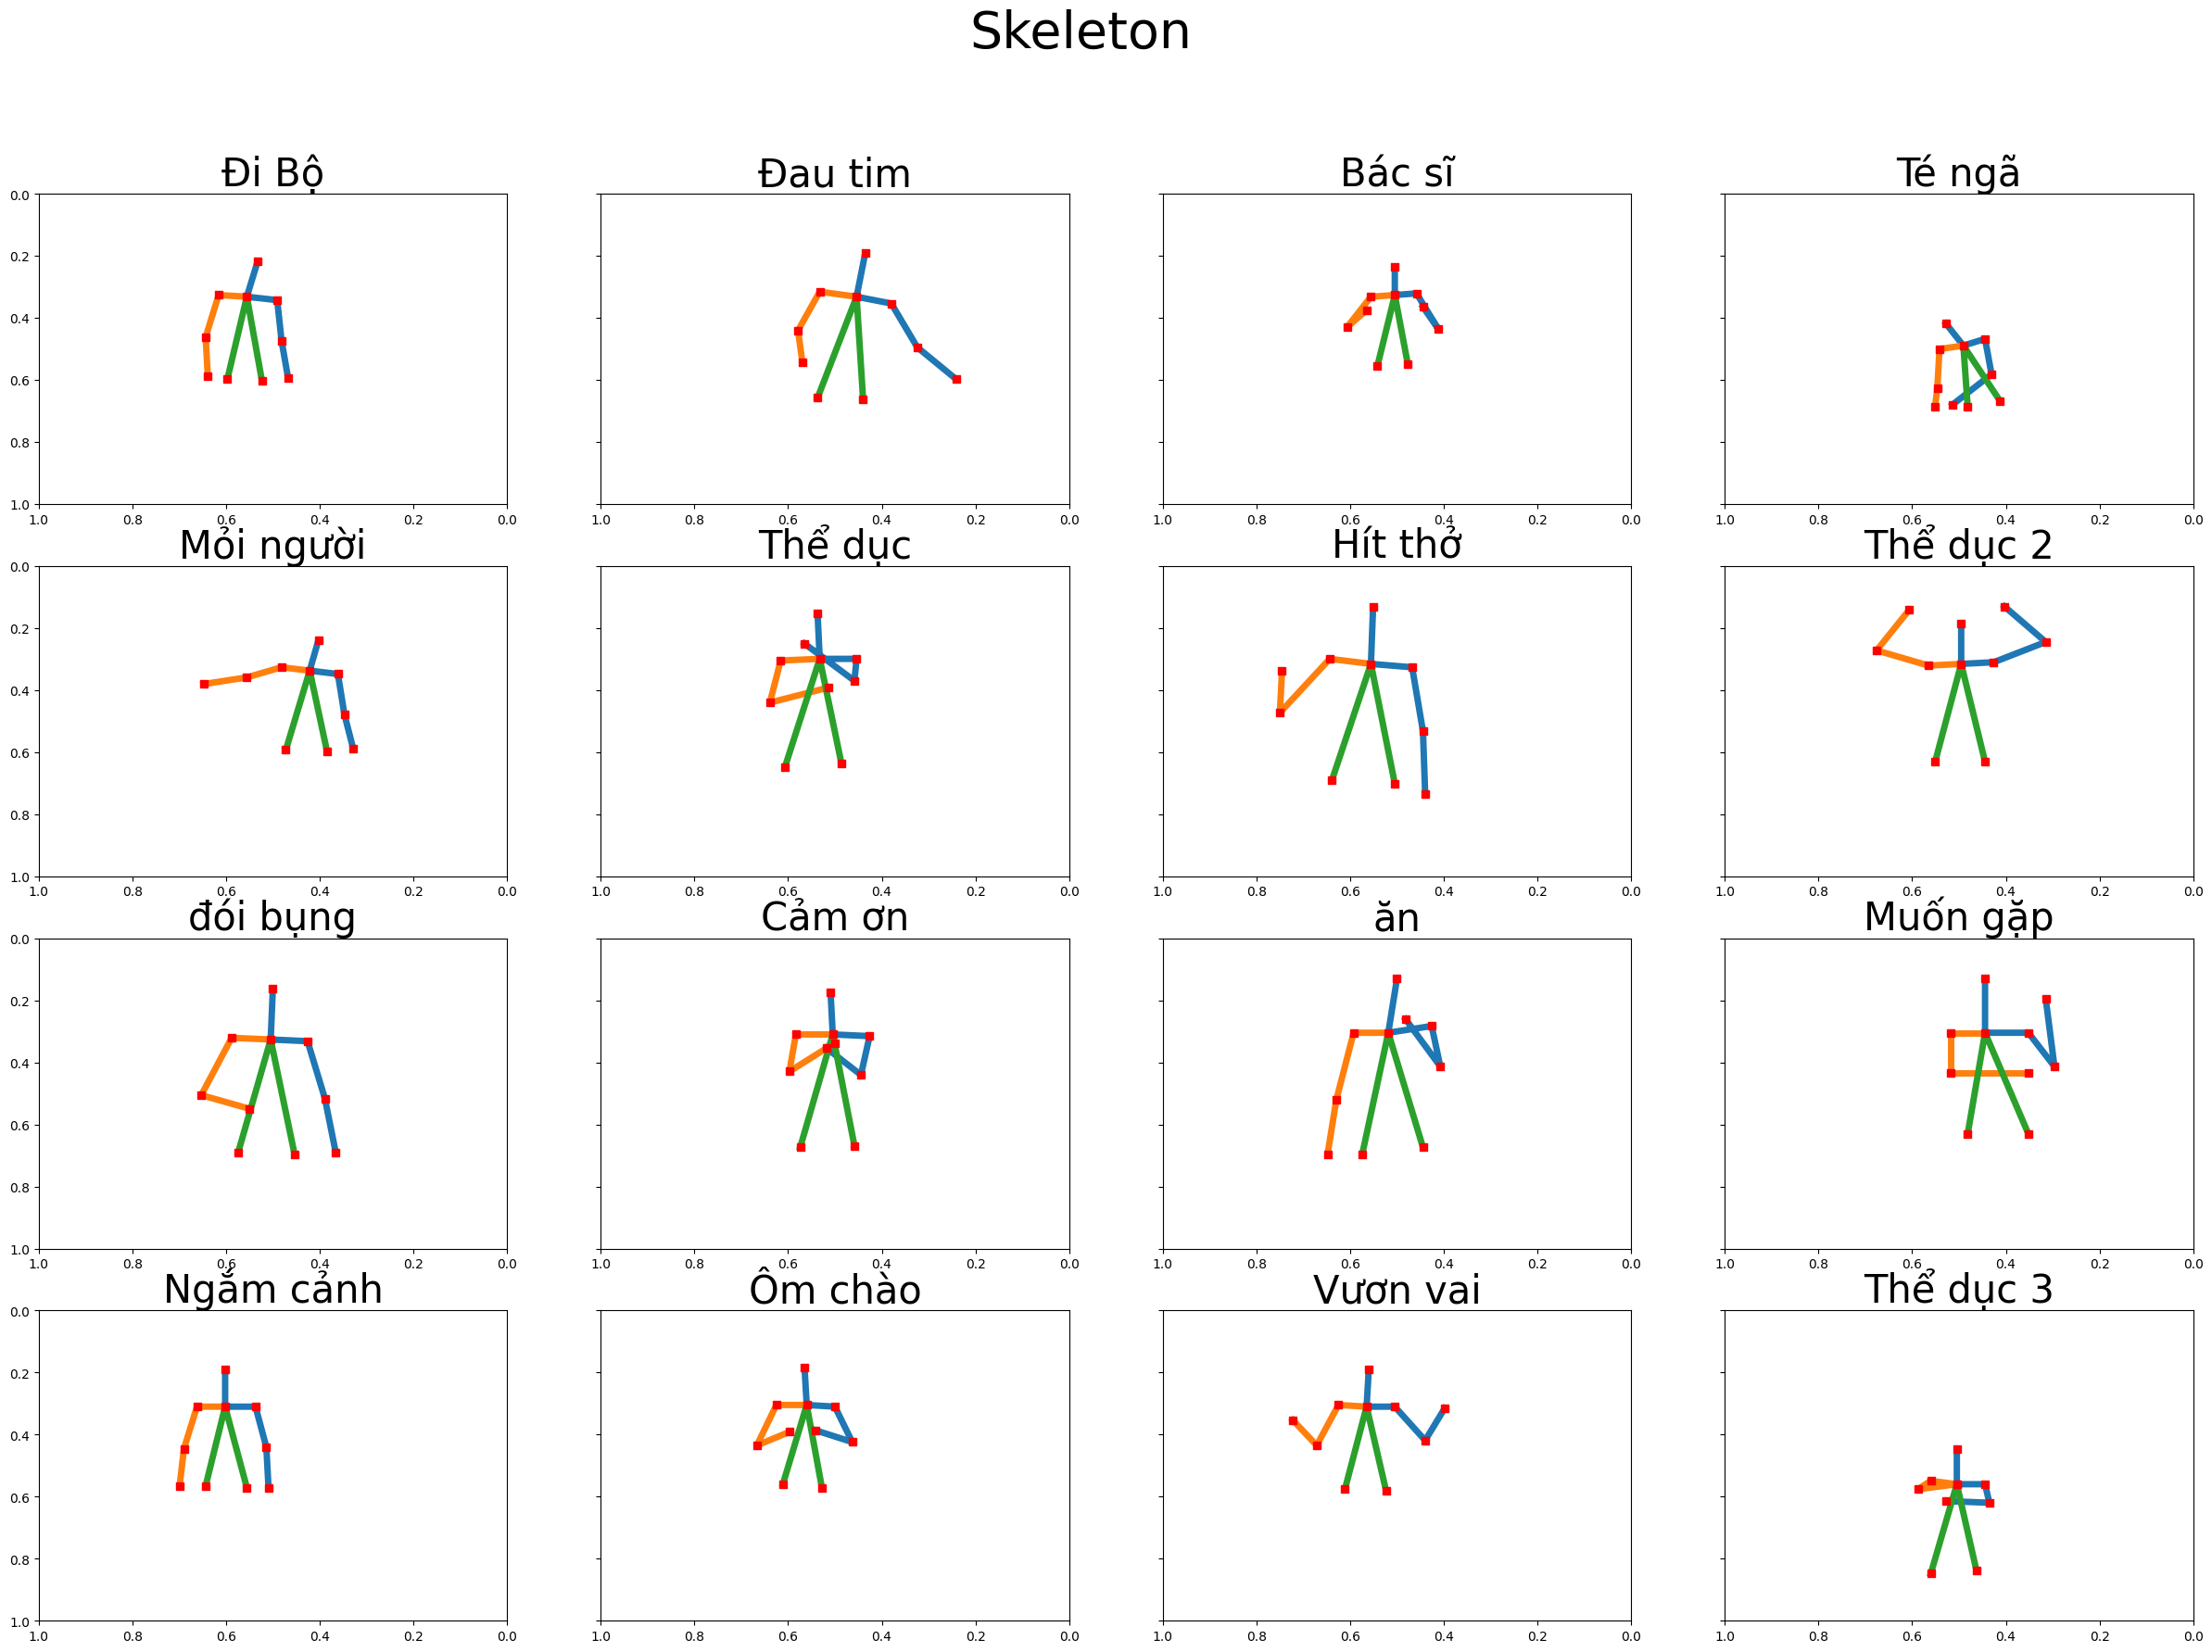

In [52]:
# Plot skeleton
df = pd.read_csv('/content/drive/MyDrive/Sign-Language-Recognition-based-on-2D-pose-estimate-master/skeleton_data/train_16.csv')
df.set_index('class', inplace=True)
class_names = ['Đi Bộ', 'Đau tim', 'Bác sĩ','Té ngã', 'Mỏi người','Thể dục',
               'Hít thở', 'Thể dục 2', 'đói bụng', 'Cảm ơn', 'ăn', 'Muốn gặp',
               'Ngắm cảnh', 'Ôm chào', 'Vươn vai', 'Thể dục 3']

fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False,
                             sharey=True, figsize=(30,20))
fig.suptitle('Skeleton', size=40)
n = 0
for x in range(4):
    for y in range(4):
        a = list(df.iloc[n*800+10])
        axes[x,y].set_title(class_names[n], size=30)
        axes[x,y].plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]], linewidth=5)
        axes[x,y].plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]], linewidth=5)
        axes[x,y].plot([a[16],a[2],a[18]], [a[17],a[3],a[19]], linewidth=5)
        axes[x,y].plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]], [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs', )
        axes[x,y].axis([1, 0, 1, 0])
        n+=1
plt.show()

[0.597222222, 0.157608696, 0.601851852, 0.304347826, 0.532407407, 0.304347826, 0.50462963, 0.451086957, 0.486111111, 0.581521739, 0.675925926, 0.304347826, 0.703703704, 0.47826087, 0.708333333, 0.619565217, 0.546296296, 0.614130435, 0.643518519, 0.635869565]
[382.22222208, 113.47826112, 385.18518528000004, 219.13043471999998, 340.74074048, 219.13043471999998, 322.96296320000005, 324.78260904, 311.11111103999997, 418.69565208, 432.59259264, 219.13043471999998, 450.37037056, 344.34782640000003, 453.33333312, 446.08695624, 349.62962944, 442.17391319999996, 411.85185216, 457.82608680000004]
[382.22222208, 113.47826112, 385.18518528000004, 219.13043471999998, 340.74074048, 219.13043471999998, 322.96296320000005, 324.78260904, 311.11111103999997, 418.69565208, 432.59259264, 219.13043471999998, 450.37037056, 344.34782640000003, 453.33333312, 446.08695624, 349.62962944, 442.17391319999996, 411.85185216, 457.82608680000004, 380.7407408, 450.0]


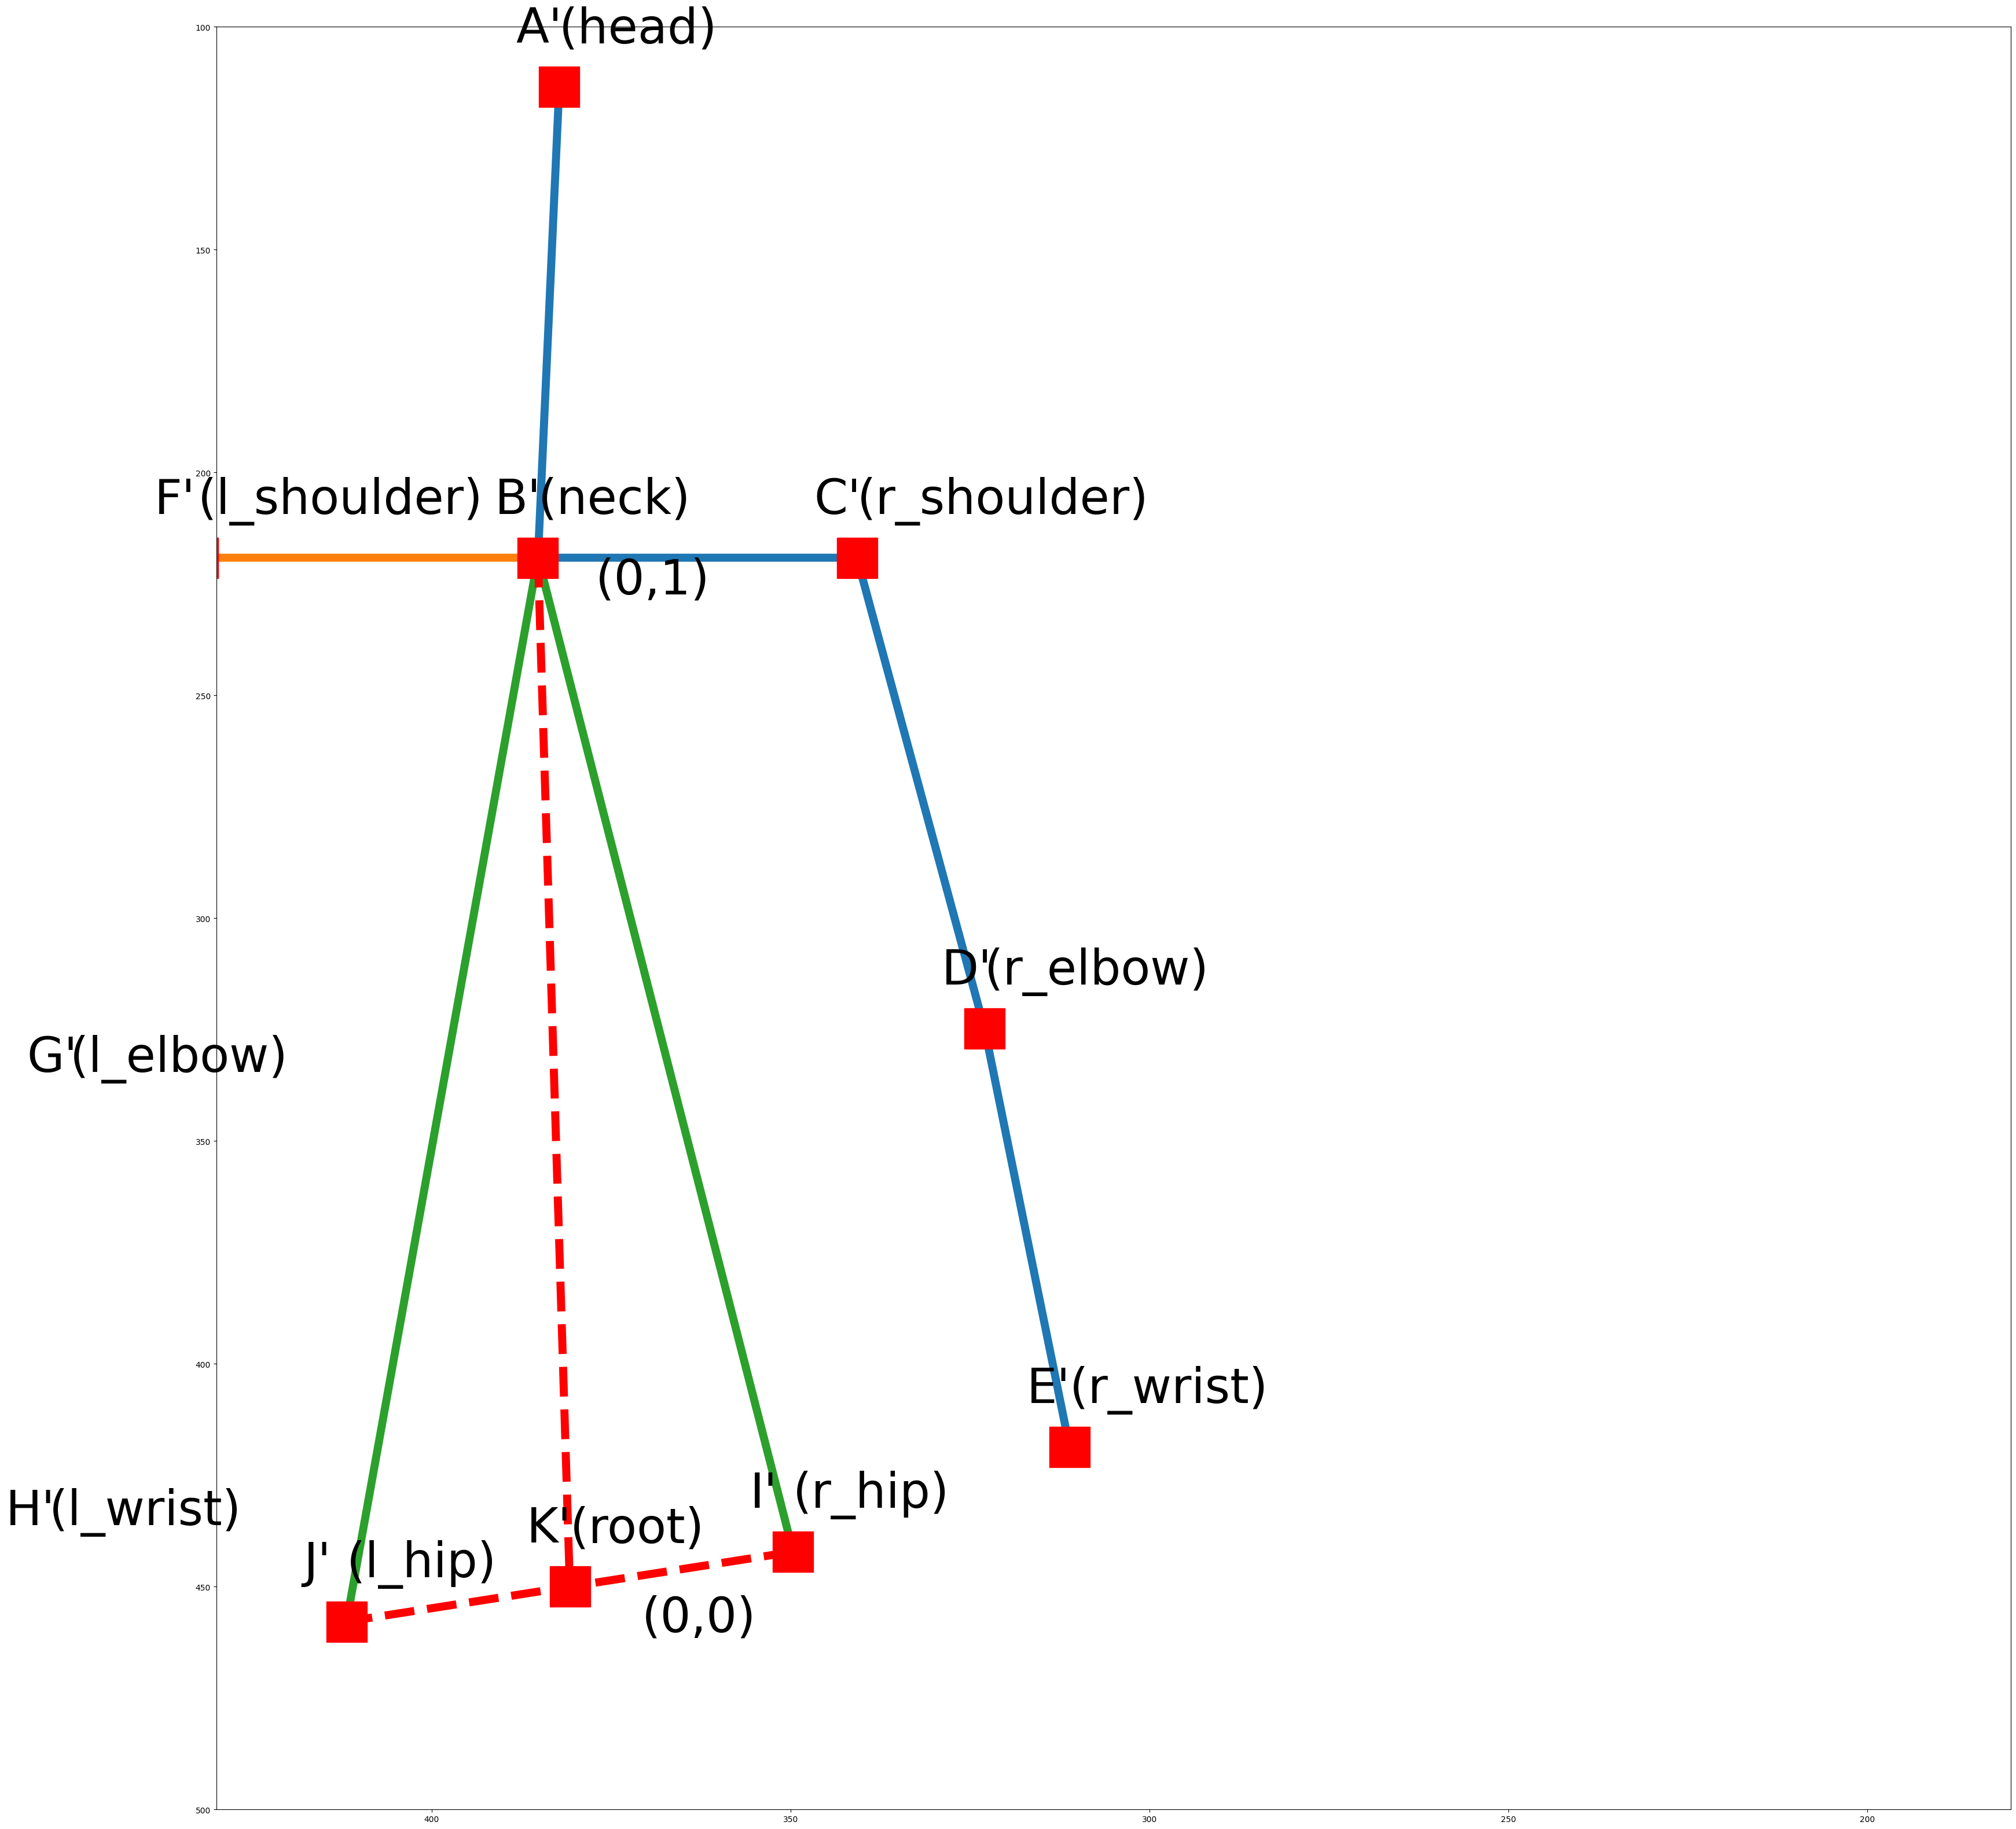

In [53]:
X = dataset[:, 0:20].astype(float)
a = list(X[0])
print(a)
joints_x = []
joints_y = []
for i in range(len(a)):
    if (i%2) !=0:
        a[i] = a[i]*720
        joints_x.append(a[i])

    else:
        a[i] = a[i]*640
        joints_y.append(a[i])
print(a)
joints_y.append((a[16]+a[18])/2)
joints_x.append((a[17]+a[19])/2)
a.append((a[16]+a[18])/2)
a.append((a[17]+a[19])/2)
print(a)
name = ['head', 'neck', 'r_shoulder', 'r_elbow','r_wrist','l_shoulder','l_elbow', 'l_wrist', 'r_hip', 'l_hip', 'root']
name_1 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
name_2 = ["A'", "B'", "C'", "D'", "E'", "F'", "G'", "H'", "I'", "J'", "K'"]
m_x = (joints_x[8] + joints_x[9])/2
m_y = (joints_y[8] + joints_y[9])/2
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False,
                             sharey=True, figsize=(40,40))
#fig.suptitle('Skeleton', size=80)
#axes.scatter(joints_x, joints_y)
axes.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]],linewidth=10)
axes.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]],linewidth=10)
axes.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]],linewidth=10)
axes.plot([a[16],a[20],a[18]], [a[17],a[21],a[19]],'r--', linewidth=10)
axes.plot([a[2],a[20]], [a[3],a[21]],'r--', linewidth=10)
#axes.plot.()

axes.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18], a[20]],
          [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19], a[21]], 'rs', markersize=50)
for i, txt in enumerate(name):
    axes.text(joints_y[i], joints_x[i]-10, '('+txt+')', fontsize=60)
for i, txt in enumerate(name_2):
    axes.text(joints_y[i]+6, joints_x[i]-10, txt, fontsize=60)

axes.text(joints_y[1]-8, joints_x[1]+8, "(0,1)", fontsize=60)
axes.text(joints_y[10]-10, joints_x[10]+10, "(0,0)", fontsize=60)
axes.axis([430, 180, 500, 100]) #axes.axis([640, 0, 720, 0])
plt.show()


[0.597222222, 0.157608696, 0.601851852, 0.304347826, 0.532407407, 0.304347826, 0.50462963, 0.451086957, 0.486111111, 0.581521739, 0.675925926, 0.304347826, 0.703703704, 0.47826087, 0.708333333, 0.619565217, 0.546296296, 0.614130435, 0.643518519, 0.635869565]
[382.22222208, 113.47826112, 385.18518528000004, 219.13043471999998, 340.74074048, 219.13043471999998, 322.96296320000005, 324.78260904, 311.11111103999997, 418.69565208, 432.59259264, 219.13043471999998, 450.37037056, 344.34782640000003, 453.33333312, 446.08695624, 349.62962944, 442.17391319999996, 411.85185216, 457.82608680000004]
[382.22222208, 113.47826112, 385.18518528000004, 219.13043471999998, 340.74074048, 219.13043471999998, 322.96296320000005, 324.78260904, 311.11111103999997, 418.69565208, 432.59259264, 219.13043471999998, 450.37037056, 344.34782640000003, 453.33333312, 446.08695624, 349.62962944, 442.17391319999996, 411.85185216, 457.82608680000004]


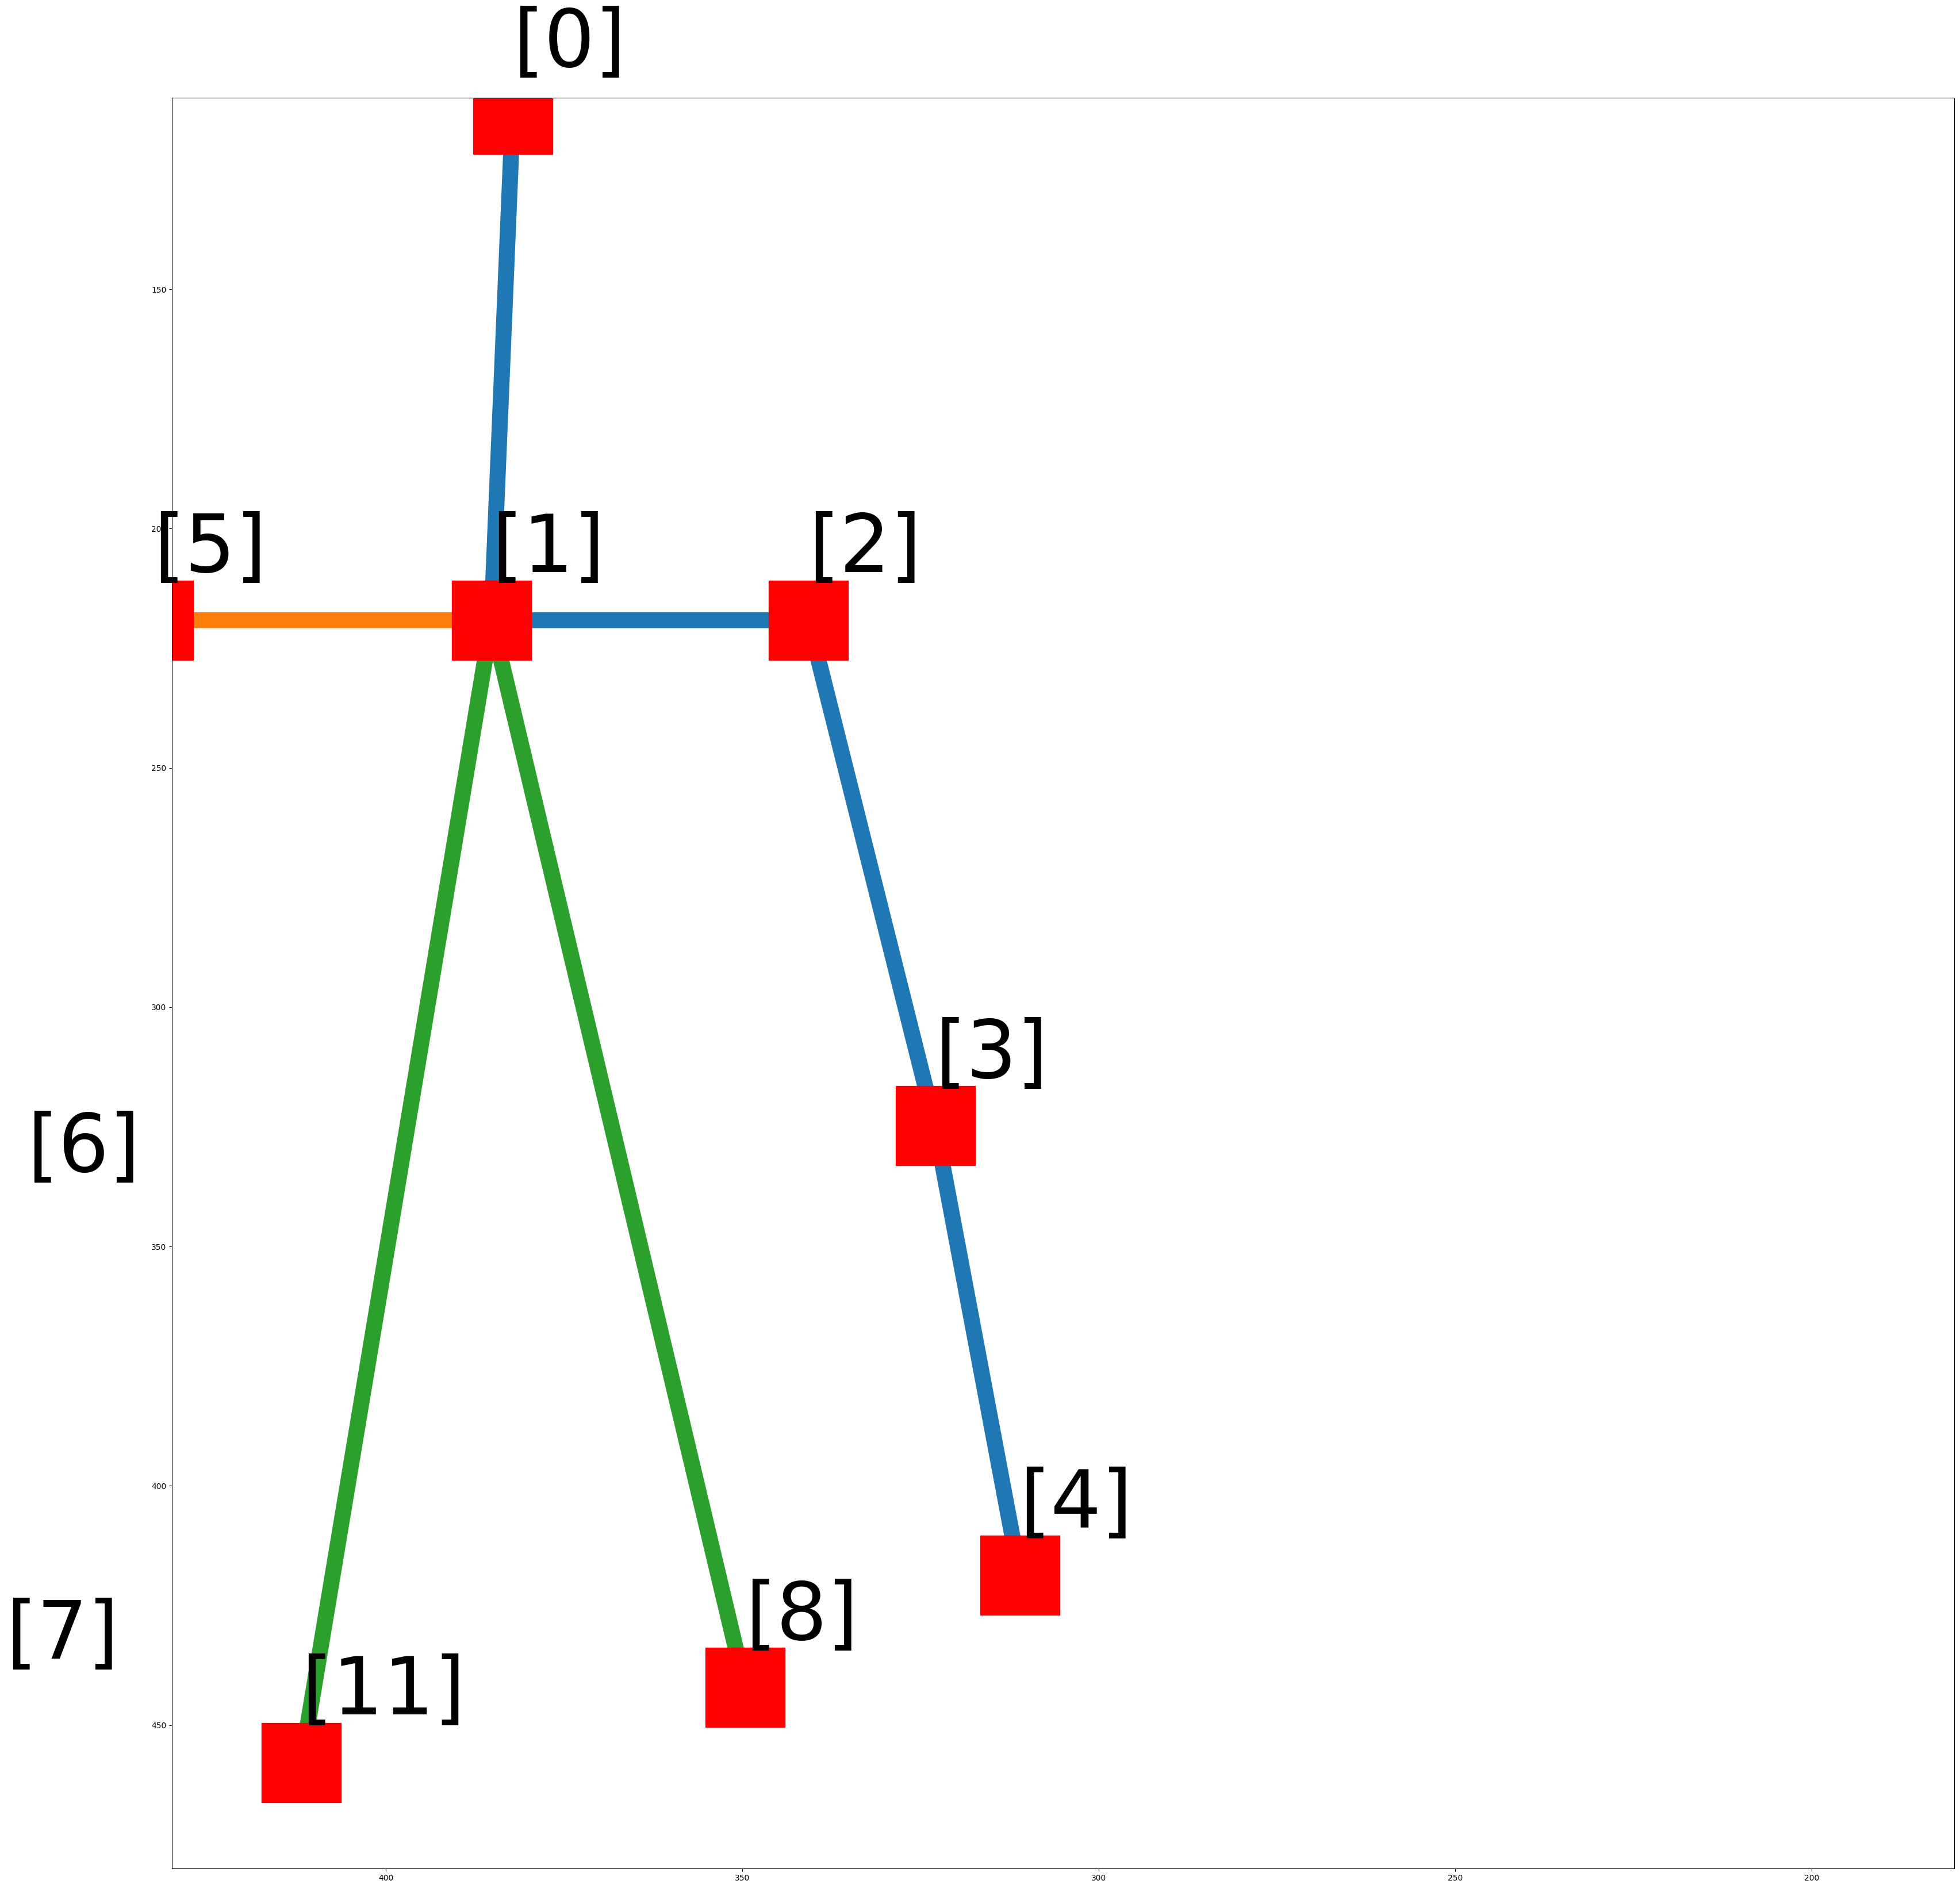

In [54]:
X = dataset[:, 0:20].astype(float)
a = list(X[0])
print(a)
joints_x = []
joints_y = []
for i in range(len(a)):
    if (i%2) !=0:
        a[i] = a[i]*720
        joints_x.append(a[i])

    else:
        a[i] = a[i]*640
        joints_y.append(a[i])
print(a)
joints_y.append((a[16]+a[18])/2)
joints_x.append((a[17]+a[19])/2)
minx = min(joints_x)
miny = min(joints_y)
maxx = max(joints_x)
maxy = min(joints_y)
#a.append((a[16]+a[18])/2)
#a.append((a[17]+a[19])/2)
print(a)
name = ['head', 'neck', 'r_shoulder', 'r_elbow','r_wrist','l_shoulder','l_elbow', 'l_wrist', 'r_hip', 'l_hip', 'root_spine']
name_1 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
name_2 = ["A'", "B'", "C'", "D'", "E'", "F'", "G'", "H'", "I'", "J'", "K'"]
name_3 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '11']
m_x = (joints_x[8] + joints_x[9])/2
m_y = (joints_y[8] + joints_y[9])/2
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False,
                             sharey=True, figsize=(40,40))
#fig.suptitle('Skeleton', size=80)
#axes.scatter(joints_x, joints_y)
axes.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]],linewidth=20)
axes.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]],linewidth=20)
axes.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]],linewidth=20)
# axes.plot([a[16],a[20],a[18]], [a[17],a[21],a[19]],'r--', linewidth=10)
# axes.plot([a[2],a[20]], [a[3],a[21]],'r--', linewidth=10)
#axes.plot.()

axes.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]],
          [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs', markersize=100)
for i, txt in enumerate(name_3):
    axes.text(joints_y[i], joints_x[i]-10, "["+txt+"]", fontsize=100)

# axes.text(joints_y[1]-8, joints_x[1]+8, "(0,1)", fontsize=40)
# axes.text(joints_y[10]-10, joints_x[10]+10, "(0,0)", fontsize=40)
axes.axis([430, 180, 480, 110]) #axes.axis([640, 0, 720, 0])
plt.show()


[0.597222222, 0.157608696, 0.601851852, 0.304347826, 0.532407407, 0.304347826, 0.50462963, 0.451086957, 0.486111111, 0.581521739, 0.675925926, 0.304347826, 0.703703704, 0.47826087, 0.708333333, 0.619565217, 0.546296296, 0.614130435, 0.643518519, 0.635869565]
[382.22222208, 113.47826112, 385.18518528000004, 219.13043471999998, 340.74074048, 219.13043471999998, 322.96296320000005, 324.78260904, 311.11111103999997, 418.69565208, 432.59259264, 219.13043471999998, 450.37037056, 344.34782640000003, 453.33333312, 446.08695624, 349.62962944, 442.17391319999996, 411.85185216, 457.82608680000004]
[382.22222208, 113.47826112, 385.18518528000004, 219.13043471999998, 340.74074048, 219.13043471999998, 322.96296320000005, 324.78260904, 311.11111103999997, 418.69565208, 432.59259264, 219.13043471999998, 450.37037056, 344.34782640000003, 453.33333312, 446.08695624, 349.62962944, 442.17391319999996, 411.85185216, 457.82608680000004]


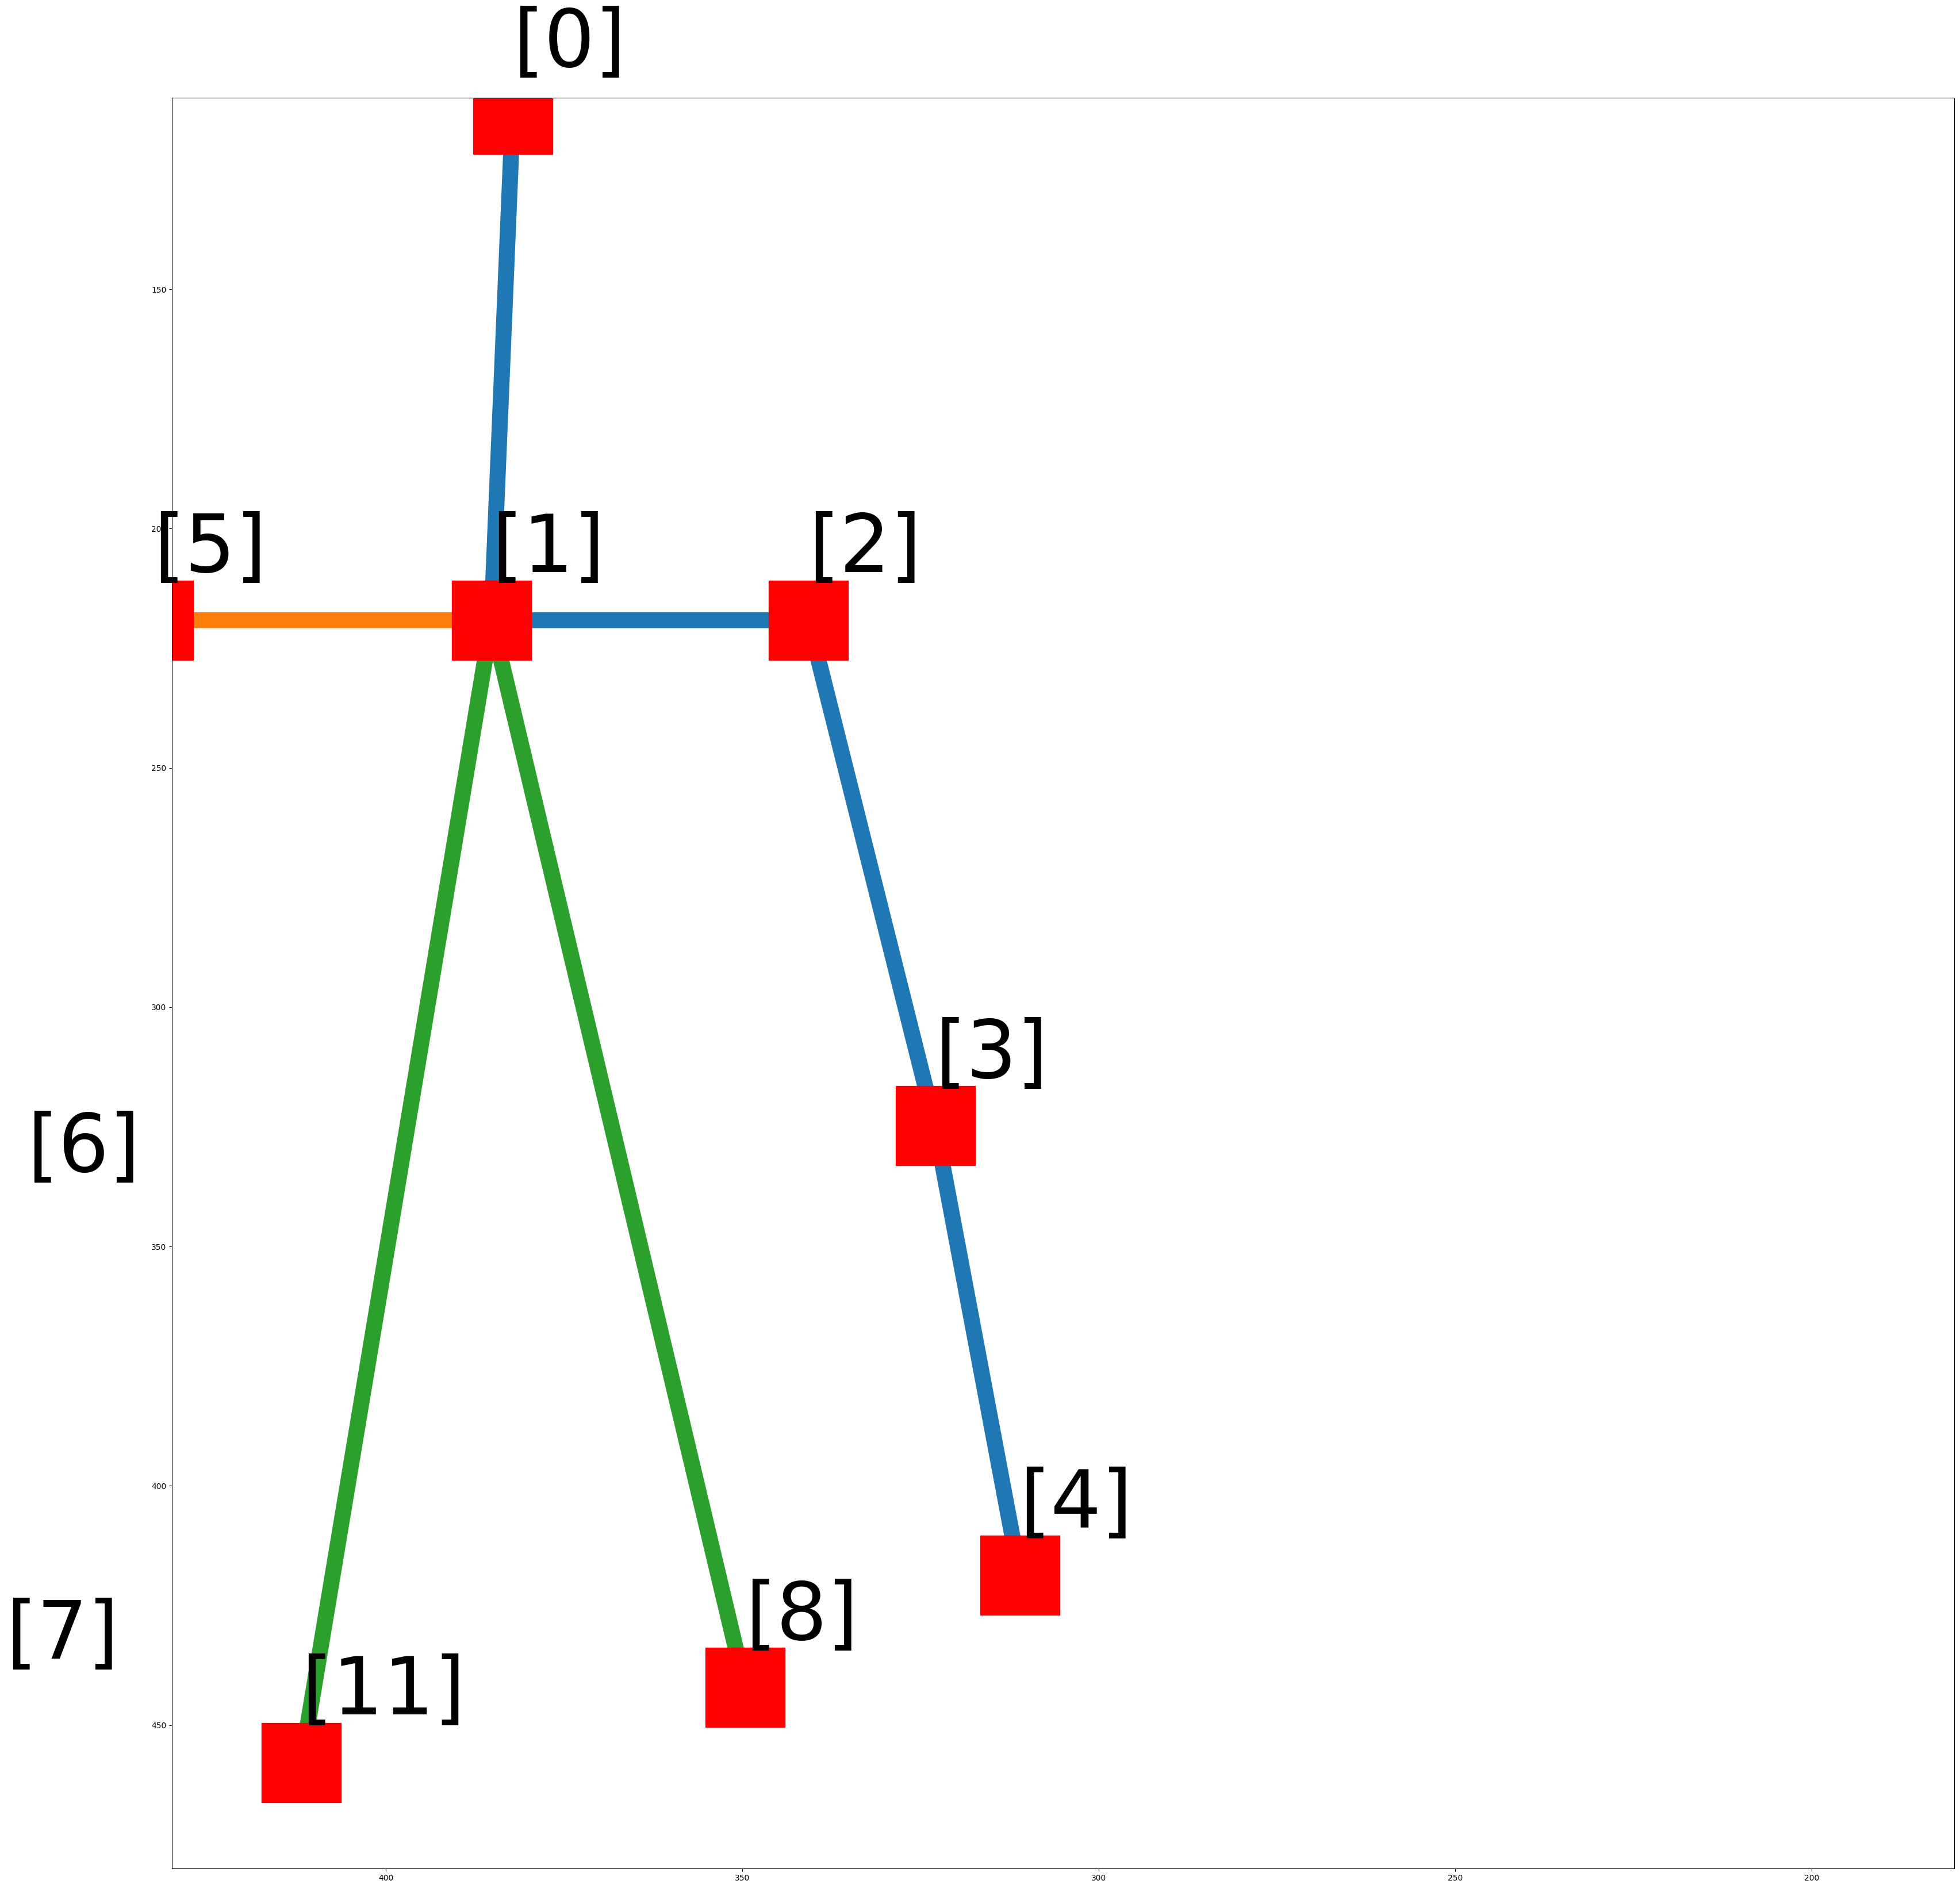

In [55]:
X = dataset[:, 0:20].astype(float)
a = list(X[0])
print(a)
joints_x = []
joints_y = []
for i in range(len(a)):
    if (i%2) !=0:
        a[i] = a[i]*720
        joints_x.append(a[i])

    else:
        a[i] = a[i]*640
        joints_y.append(a[i])
print(a)
joints_y.append((a[16]+a[18])/2)
joints_x.append((a[17]+a[19])/2)
minx = min(joints_x)
miny = min(joints_y)
maxx = max(joints_x)
maxy = min(joints_y)
#a.append((a[16]+a[18])/2)
#a.append((a[17]+a[19])/2)
print(a)
name = ['head', 'neck', 'r_shoulder', 'r_elbow','r_wrist','l_shoulder','l_elbow', 'l_wrist', 'r_hip', 'l_hip', 'root_spine']
name_1 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
name_2 = ["A'", "B'", "C'", "D'", "E'", "F'", "G'", "H'", "I'", "J'", "K'"]
name_3 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '11']
m_x = (joints_x[8] + joints_x[9])/2
m_y = (joints_y[8] + joints_y[9])/2
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False,
                             sharey=True, figsize=(40,40))
#fig.suptitle('Skeleton', size=80)
#axes.scatter(joints_x, joints_y)
axes.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]],linewidth=20)
axes.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]],linewidth=20)
axes.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]],linewidth=20)
# axes.plot([a[16],a[20],a[18]], [a[17],a[21],a[19]],'r--', linewidth=10)
# axes.plot([a[2],a[20]], [a[3],a[21]],'r--', linewidth=10)
#axes.plot.()

axes.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]],
          [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs', markersize=100)
for i, txt in enumerate(name_3):
    axes.text(joints_y[i], joints_x[i]-10, "["+txt+"]", fontsize=100)

# axes.text(joints_y[1]-8, joints_x[1]+8, "(0,1)", fontsize=40)
# axes.text(joints_y[10]-10, joints_x[10]+10, "(0,0)", fontsize=40)
axes.axis([430, 180, 480, 110]) #axes.axis([640, 0, 720, 0])
plt.show()

[382.22222208, 113.47826112, 385.18518528000004, 219.13043471999998, 340.74074048, 219.13043471999998, 322.96296320000005, 324.78260904, 311.11111103999997, 418.69565208, 432.59259264, 219.13043471999998, 450.37037056, 344.34782640000003, 453.33333312, 446.08695624, 349.62962944, 442.17391319999996, 411.85185216, 457.82608680000004]
toa do:  (113.47826112, 311.11111103999997, 457.82608680000004, 453.33333312)


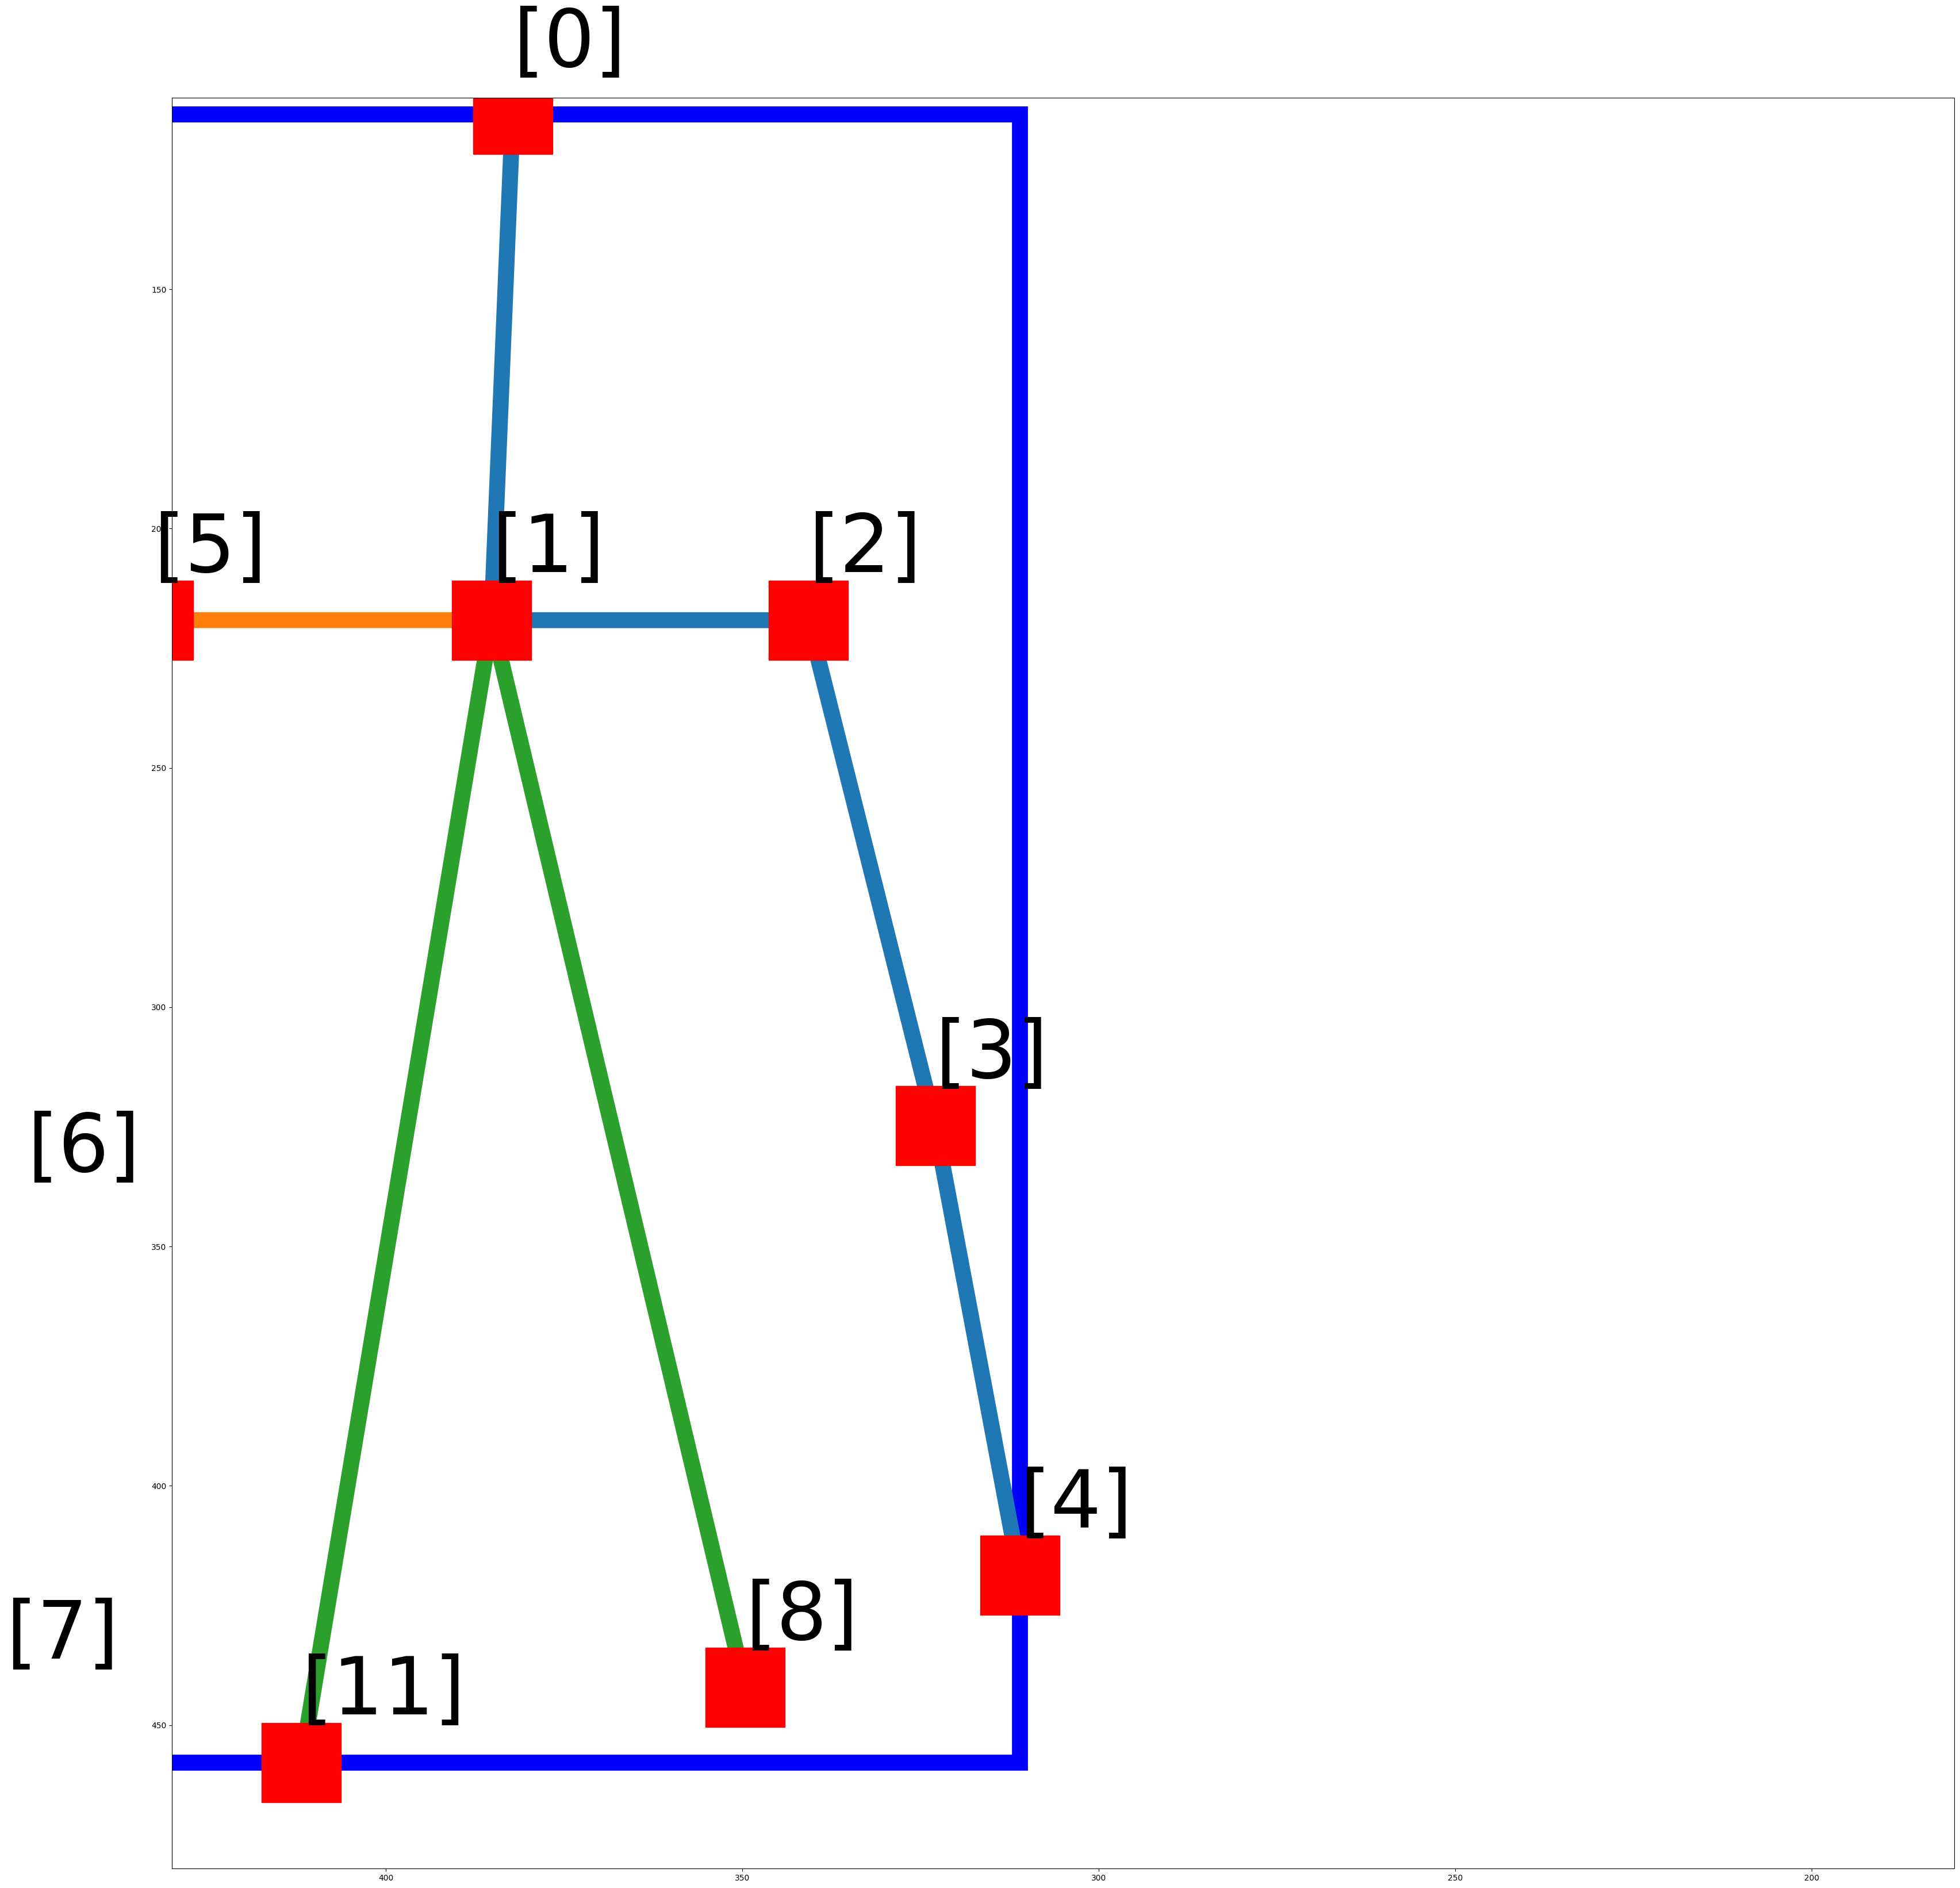

In [56]:
import matplotlib.patches as patches
X = dataset[:, 0:20].astype(float)
a = list(X[0])
#print(a)
joints_x = []
joints_y = []
for i in range(len(a)):
    if (i%2) !=0:
        a[i] = a[i]*720
        joints_x.append(a[i])

    else:
        a[i] = a[i]*640
        joints_y.append(a[i])
#print(a)
joints_y.append((a[16]+a[18])/2)
joints_x.append((a[17]+a[19])/2)
minx = min(joints_x)
miny = min(joints_y)
maxx = max(joints_x)
maxy = max(joints_y)
#a.append((a[16]+a[18])/2)
#a.append((a[17]+a[19])/2)
print(a)
name = ['head', 'neck', 'r_shoulder', 'r_elbow','r_wrist','l_shoulder','l_elbow', 'l_wrist', 'r_hip', 'l_hip', 'root_spine']
name_1 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
name_2 = ["A'", "B'", "C'", "D'", "E'", "F'", "G'", "H'", "I'", "J'", "K'"]
name_3 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '11']
m_x = (joints_x[8] + joints_x[9])/2
m_y = (joints_y[8] + joints_y[9])/2
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False,
                             sharey=True, figsize=(40,40))
#fig.suptitle('Skeleton', size=80)
#axes.scatter(joints_x, joints_y)
axes.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]],linewidth=20)
axes.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]],linewidth=20)
axes.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]],linewidth=20)

tamgiac = patches.Rectangle((miny, minx), maxy - miny, maxx - minx,linewidth=20,edgecolor='b',facecolor='none')
axes.add_patch(tamgiac)
#plt.Rectangle((minx, miny),maxx - minx, maxy - miny, fill=True, edgecolor=(0.4,0,0.3), linewidth=40)#
# axes.plot([a[16],a[20],a[18]], [a[17],a[21],a[19]],'r--', linewidth=10)
# axes.plot([a[2],a[20]], [a[3],a[21]],'r--', linewidth=10)
#axes.plot.()
print('toa do: ',(minx, miny, maxx, maxy))
axes.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]],
          [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs', markersize=100)
for i, txt in enumerate(name_3):
    axes.text(joints_y[i], joints_x[i]-10, "["+txt+"]", fontsize=100)

# axes.text(joints_y[1]-8, joints_x[1]+8, "(0,1)", fontsize=40)
# axes.text(joints_y[10]-10, joints_x[10]+10, "(0,0)", fontsize=40)
axes.axis([430, 180, 480, 110]) #axes.axis([640, 0, 720, 0])
plt.show()

In [57]:
import matplotlib.patches as patches
X = dataset[:, 0:20].astype(float)
a = list(X[0])
#print(a)
joints_x = []
joints_y = []
for i in range(len(a)):
    if (i%2) !=0:
        a[i] = a[i]*720
        joints_x.append(a[i])

    else:
        a[i] = a[i]*640
        joints_y.append(a[i])
#print(a)
#joints_y.append((a[16]+a[18])/2)
#joints_x.append((a[17]+a[19])/2)
minx = min(joints_x)
miny = min(joints_y)
maxx = max(joints_x)
maxy = max(joints_y)
joints_x = []
joints_y = []
for i in range(len(a)):
    if (i%2) !=0:
        a[i] = (a[i]-minx)/(maxx-minx)
        joints_x.append(a[i])

    else:
        a[i] = (a[i]-miny)/(maxy-miny)
        joints_y.append(a[i])
minx = min(joints_x)
miny = min(joints_y)
maxx = max(joints_x)
maxy = max(joints_y)
#a.append((a[16]+a[18])/2)
#a.append((a[17]+a[19])/2)
print(a)
name = ['head', 'neck', 'r_shoulder', 'r_elbow','r_wrist','l_shoulder','l_elbow', 'l_wrist', 'r_hip', 'l_hip', 'root_spine']
name_1 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
name_2 = ["A'", "B'", "C'", "D'", "E'", "F'", "G'", "H'", "I'", "J'", "K'"]
name_3 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '11']
m_x = (joints_x[8] + joints_x[9])/2
m_y = (joints_y[8] + joints_y[9])/2
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False,
                             sharey=True, figsize=(40,40))
#fig.suptitle('Skeleton', size=80)
#axes.scatter(joints_x, joints_y)
axes.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]],linewidth=20)
axes.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]],linewidth=20)
axes.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]],linewidth=20)

hcn = patches.Rectangle((miny, minx), maxy - miny, maxx - minx,linewidth=50,edgecolor='b',facecolor='none')
axes.add_patch(hcn)
#plt.Rectangle((minx, miny),maxx - minx, maxy - miny, fill=True, edgecolor=(0.4,0,0.3), linewidth=40)#
# axes.plot([a[16],a[20],a[18]], [a[17],a[21],a[19]],'r--', linewidth=10)
# axes.plot([a[2],a[20]], [a[3],a[21]],'r--', linewidth=10)
#axes.plot.()
print('toa do: ',(minx, miny, maxx, maxy))
axes.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]],
          [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs', markersize=100)
for i, txt in enumerate(name_3):
    axes.text(joints_y[i], joints_x[i]-10, "["+txt+"]", fontsize=100)

# axes.text(joints_y[1]-8, joints_x[1]+8, "(0,1)", fontsize=40)
# axes.text(joints_y[10]-10, joints_x[10]+10, "(0,0)", fontsize=40)
axes.axis([1, 0, 1, 0]) #axes.axis([640, 0, 720, 0])
plt.show()

[0.5, 0.0, 0.5208333350208336, 0.30681818127169413, 0.20833333220833347, 0.30681818127169413, 0.08333333558333385, 0.6136363646342975, 0.0, 0.8863636364111569, 0.8541666683541668, 0.30681818127169413, 0.9791666694791668, 0.670454546428719, 1.0, 0.9659090905051652, 0.27083333277083327, 0.9545454554008262, 0.7083333367083334, 1.0]
toa do:  (0.0, 0.0, 1.0, 1.0)


float64


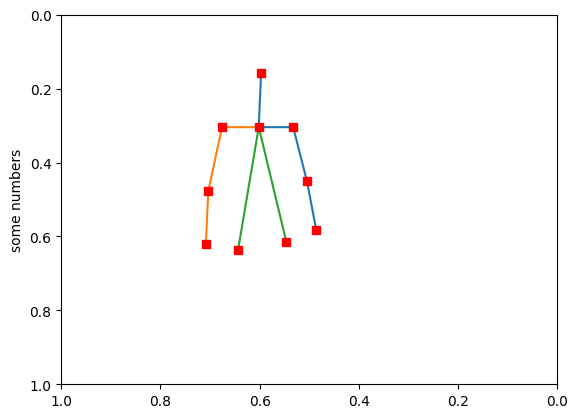

In [58]:
a = X[0]
print(a[0].dtype)
plt.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]])
plt.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]])
plt.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]])

plt.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]], [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs')

plt.axis([1, 0, 1, 0])
plt.ylabel('some numbers')
plt.show()

In [59]:
#Test
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
     11, 12, 13, 14, 15, 16, 17, 18,
     19, 20, 21, 22, 23, 24, 25, 26,
     27, 28, 29, 30, 31, 32, 33, 34, 35]
x0 = x[2:2+13*2]
print('x0: ',x0)


lx = []
ly = []
N =  26 #len(x_input)
i = 0
while i<N:
    lx.append(x0[i])
    ly.append(x0[i+1])
    i+=2
lx = np.array(lx)
ly = np.array(ly)
non_zero_x = lx
non_zero_y = ly
print('non_zero_x', non_zero_x)
print('non_zero_y', non_zero_y)

# Normalization x/y data according to the bounding box
origin_x = np.min(non_zero_x)
origin_y = np.min(non_zero_y)
print(origin_x)
print(origin_y)
len_x = np.max(non_zero_x) - np.min(non_zero_x)
len_y = np.max(non_zero_y) - np.min(non_zero_y)
print('len_x: ', len_x)
print('len_y: ', len_y)

x0:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
non_zero_x [ 2  4  6  8 10 12 14 16 18 20 22 24 26]
non_zero_y [ 3  5  7  9 11 13 15 17 19 21 23 25 27]
2
3
len_x:  24
len_y:  24


In [60]:
#Test
def normalize(x_input):
    # Separate original data into x_list and y_list
    lx = []
    ly = []
    N = len(x_input) #26
    i = 0
    while i<N:
        lx.append(x_input[i])
        ly.append(x_input[i+1])
        i+=2
    lx = np.array(lx)
    ly = np.array(ly)

    # Get rid of undetected data (=0)
    non_zero_x = []
    non_zero_y = []
    for i in range(int(N/2)):
        if lx[i] != 0:
            non_zero_x.append(lx[i])
        if ly[i] != 0:
            non_zero_y.append(ly[i])
    if len(non_zero_x) == 0 or len(non_zero_y) == 0:
        return np.array([0] * N)

    # Normalization x/y data according to the bounding box
    origin_x = np.min(non_zero_x)
    origin_y = np.min(non_zero_y)
    len_x = np.max(non_zero_x) - np.min(non_zero_x)
    len_y = np.max(non_zero_y) - np.min(non_zero_y)
    x_new = []
    for i in range(int(N/2)):
        if (lx[i] + ly[i]) == 0:
            x_new.append(-1)
            x_new.append(-1)
        else:
            x_new.append((lx[i] - origin_x) / len_x)
            x_new.append((ly[i] - origin_y) / len_y)
    return x_new
kq = normalize(x0)
print(len(kq))

26


In [61]:
X_pp = []
for i in range(len(X)):
    X_pp.append(dpp.pose_normalization_20(X[i]))
X_pp = np.array(X_pp)
print('X_pp.shape: ', X_pp.shape)

X_pp.shape:  (12800, 20)


float64


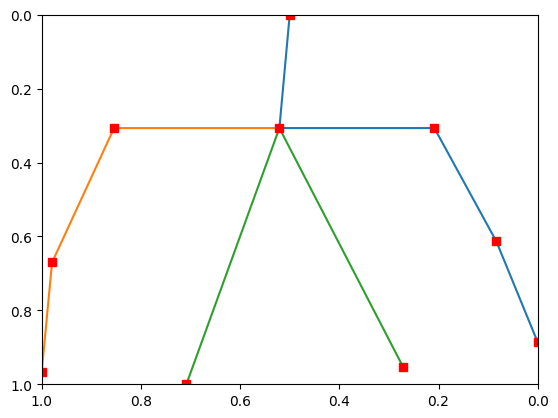

In [62]:
a = X_pp[0]
print(a[0].dtype)
plt.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]])
plt.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]])
plt.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]])

plt.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]], [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs')

plt.axis([1, 0, 1, 0])
#plt.ylabel('some numbers')
plt.show()

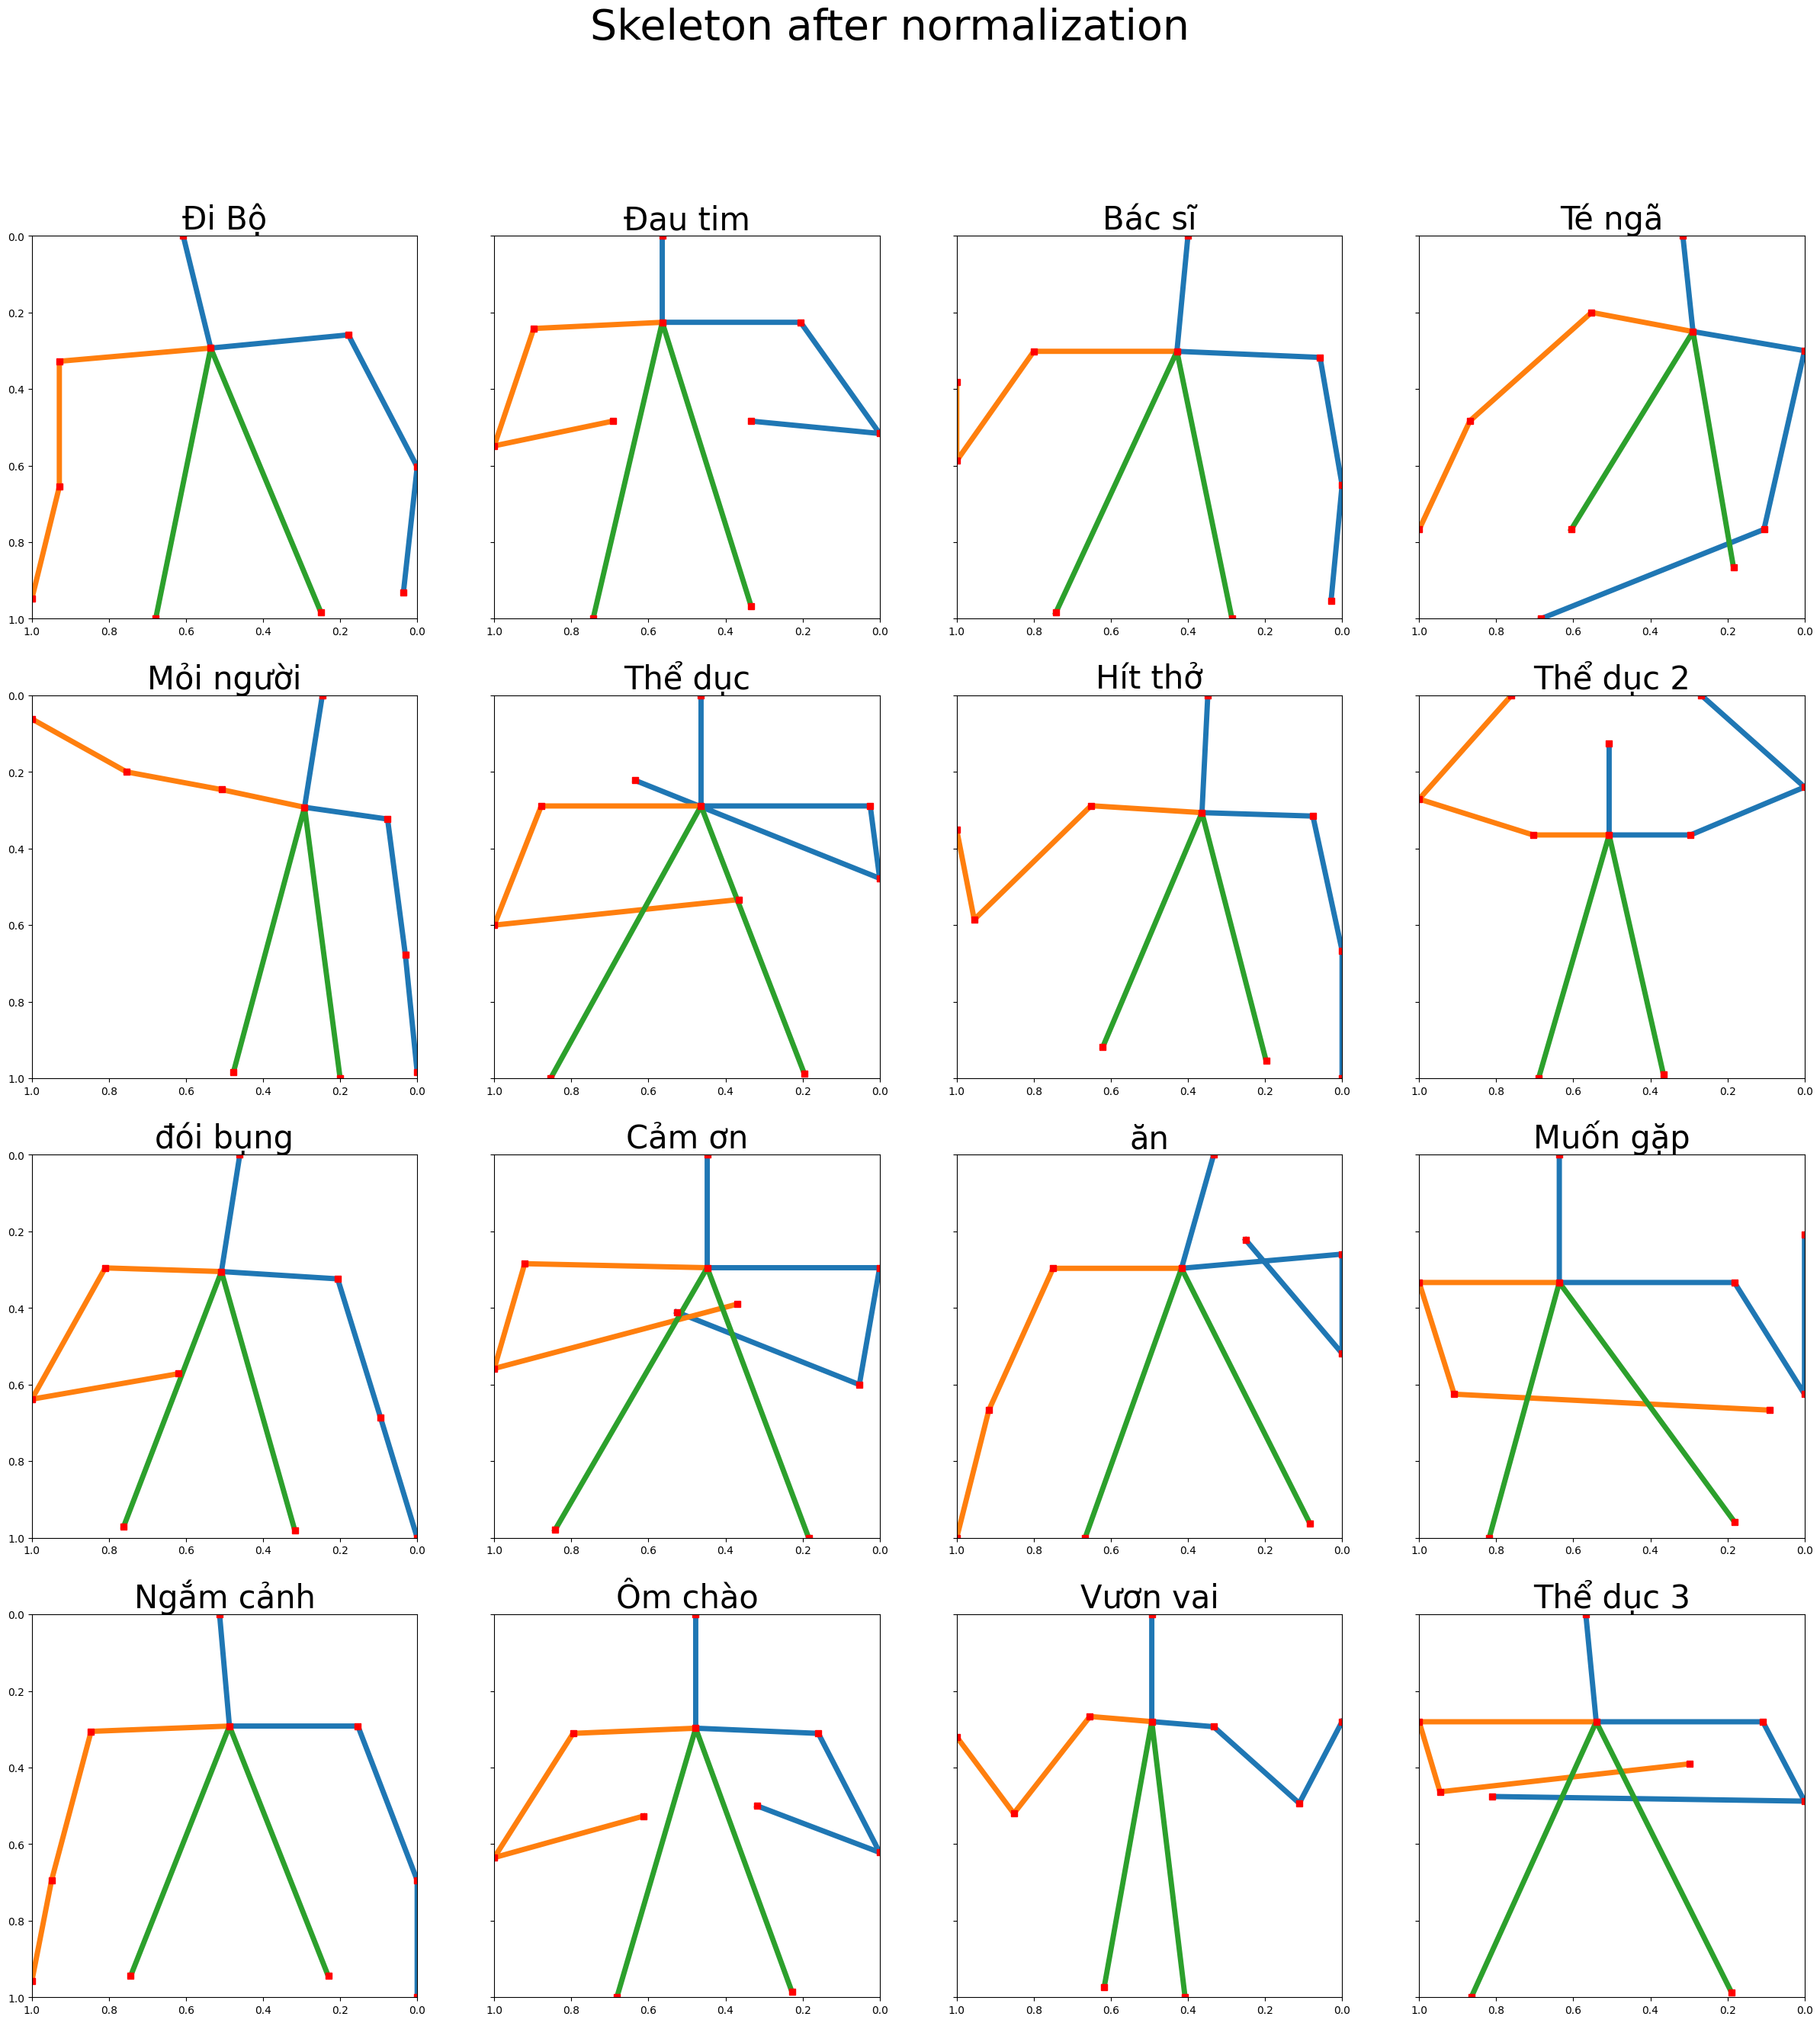

In [63]:
# Plot skeleton after normalize
class_names = ['Đi Bộ', 'Đau tim', 'Bác sĩ','Té ngã', 'Mỏi người','Thể dục',
               'Hít thở', 'Thể dục 2', 'đói bụng', 'Cảm ơn', 'ăn', 'Muốn gặp',
               'Ngắm cảnh', 'Ôm chào', 'Vươn vai', 'Thể dục 3']

fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False,
                             sharey=True, figsize=(30,30))
fig.suptitle('Skeleton after normalization', size=40)
n = 0
for x in range(4):
    for y in range(4):
        a = list(X_pp[n*800+100])
        axes[x,y].set_title(class_names[n], size=30)
        axes[x,y].plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]], linewidth=5)
        axes[x,y].plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]], linewidth=5)
        axes[x,y].plot([a[16],a[2],a[18]], [a[17],a[3],a[19]], linewidth=5)
        axes[x,y].plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]], [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs', )
        axes[x,y].axis([1, 0, 1, 0])
        n+=1
plt.show()

In [64]:
encoder = LabelEncoder()
encoder_Y = encoder.fit_transform(Y)
matrix_Y = np_utils.to_categorical(encoder_Y)

In [65]:
print(X_pp.shape)
print(Y.shape)
print(matrix_Y.shape)
print(matrix_Y)

(12800, 20)
(12800,)
(12800, 16)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [66]:
print(Y[0], ": ", encoder_Y[0])
print(Y[800], ": ", encoder_Y[800])
print(Y[1600], ": ", encoder_Y[1600])
print(Y[2400], ": ", encoder_Y[2400])
print(Y[3200], ": ", encoder_Y[3200])
print(Y[4000], ": ", encoder_Y[4000])
print(Y[4800], ": ", encoder_Y[4800])
print(Y[5600], ": ", encoder_Y[5600])
print(Y[6400], ": ", encoder_Y[6400])
print(Y[7200], ": ", encoder_Y[7200])
print(Y[8000], ": ", encoder_Y[8000])
print(Y[8800], ": ", encoder_Y[8800])
print(Y[9600], ": ", encoder_Y[9600])
print(Y[10400], ": ", encoder_Y[10400])
print(Y[11200], ": ", encoder_Y[11200])
print(Y[12000], ": ", encoder_Y[12000])

0.0 :  0
1.0 :  1
2.0 :  2
3.0 :  3
4.0 :  4
5.0 :  5
6.0 :  6
7.0 :  7
8.0 :  8
9.0 :  9
10.0 :  10
11.0 :  11
12.0 :  12
13.0 :  13
14.0 :  14
15.0 :  15


In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pp, matrix_Y, test_size=0.2, random_state=42)

In [68]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [69]:
model = Sequential()
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=16, activation='softmax'))
model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['acc'])
#plot_model(model, to_file='model.png', show_shapes=True)

In [70]:
checkpoint = ModelCheckpoint('sign_language_17.h5', monitor='val_acc', verbose=1, mode = 'max', save_best_only=True, save_weights_only=False, period=1)
history = model.fit(X_train, Y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, Y_test), callbacks = [checkpoint])
model.save('sign_language_18.h5')

Epoch 1/50
316/320 [============================>.] - ETA: 0s - loss: 1.6600 - acc: 0.5793
Epoch 1: val_acc improved from -inf to 0.21094, saving model to sign_language_17.h5
320/320 [==============================] - 6s 12ms/step - loss: 1.6505 - acc: 0.5827 - val_loss: 2.2889 - val_acc: 0.2109
Epoch 2/50
319/320 [============================>.] - ETA: 0s - loss: 0.7540 - acc: 0.8768
Epoch 2: val_acc improved from 0.21094 to 0.89414, saving model to sign_language_17.h5
320/320 [==============================] - 3s 11ms/step - loss: 0.7531 - acc: 0.8770 - val_loss: 0.6615 - val_acc: 0.8941
Epoch 3/50
319/320 [============================>.] - ETA: 0s - loss: 0.5448 - acc: 0.9048
Epoch 3: val_acc improved from 0.89414 to 0.91836, saving model to sign_language_17.h5
320/320 [==============================] - 2s 5ms/step - loss: 0.5443 - acc: 0.9049 - val_loss: 0.4003 - val_acc: 0.9184
Epoch 4/50
308/320 [===========================>..] - ETA: 0s - loss: 0.4252 - acc: 0.9238
Epoch 4: val_

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (32, 128)                 2688      
                                                                 
 batch_normalization_6 (Batc  (32, 128)                512       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (32, 64)                  8256      
                                                                 
 batch_normalization_7 (Batc  (32, 64)                 256       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (32, 32)                  2080      
                                                                 
 batch_normalization_8 (Batc  (32, 32)                

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


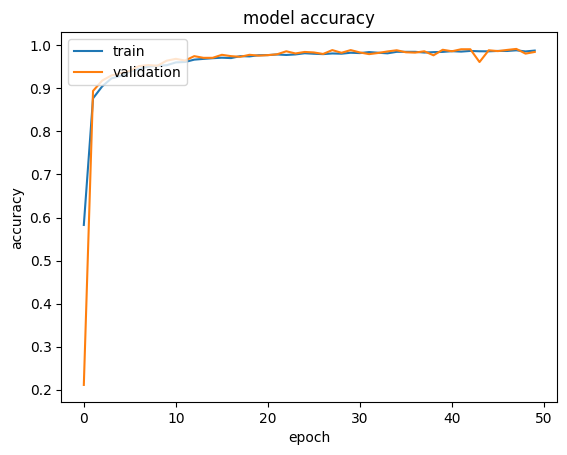

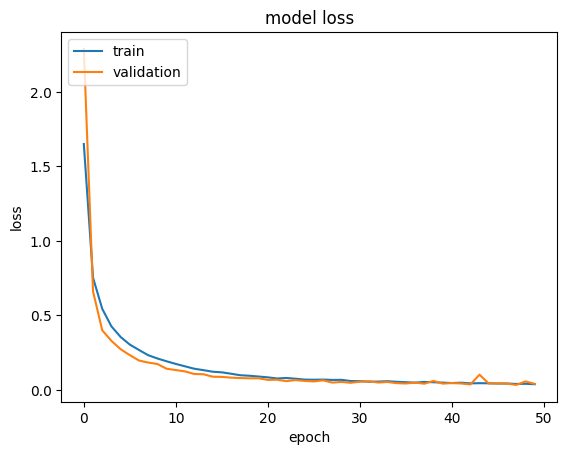

In [72]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [73]:
model = load_model('sign_language_18.h5')

In [74]:
Y_pred = model.predict(X_test)

80/80 [==============================] - 0s 2ms/step


In [75]:
print(X_test)

[[0.38983051 0.         0.38983051 ... 0.98       0.6779661  0.96      ]
 [0.69230769 0.         0.61538462 ... 1.         0.84615385 1.        ]
 [0.57142857 0.         0.51428571 ... 1.         0.74285714 1.        ]
 ...
 [0.43902439 0.         0.43902439 ... 1.         0.70731707 0.98611111]
 [0.51282051 0.         0.51282051 ... 1.         0.74358974 0.98181818]
 [0.45652174 0.         0.47826087 ... 1.         0.76086956 0.97826087]]


In [76]:
print(Y_pred)

[[6.15763420e-05 3.23283566e-05 1.14342947e-05 ... 4.48382198e-05
  1.16097963e-05 5.40732970e-07]
 [8.52137327e-06 1.27399771e-05 2.00729646e-05 ... 4.55876670e-06
  5.50995428e-05 2.84901876e-06]
 [3.09659226e-05 9.99826968e-01 8.94903587e-06 ... 6.05885689e-05
  1.02935655e-06 2.09449609e-05]
 ...
 [8.61393695e-04 1.39778385e-05 5.25211071e-05 ... 3.61463640e-06
  2.65598419e-06 2.88500178e-06]
 [1.76965536e-04 9.99518871e-01 2.27488545e-05 ... 6.99620568e-06
  1.50648589e-06 5.35837680e-05]
 [4.50222700e-07 1.07831147e-06 2.22638263e-07 ... 1.00046623e-06
  2.70172541e-06 7.90391641e-05]]


In [77]:
print(Y_pred.shape)

(2560, 16)


In [78]:
print(Y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [79]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=40)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize = 30)
    plt.yticks(tick_marks, classes, fontsize = 30)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 25)

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 25)
    plt.xlabel('Predicted label', fontsize = 25)

In [80]:
cfm = confusion_matrix(np.argmax(Y_test,axis=1), np.argmax(Y_pred, axis=1))

In [81]:
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[154   0   0   2   1   1   0   0   3   0   0   0   7   0   0   0]
 [  0 160   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   1 160   0   3   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 171   0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 140   0   0   0   0   0   0   0  15   0   0   0]
 [  0   0   0   0   0 162   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0 156   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 151   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 144   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 163   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 168   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 160   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0 173   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0 144   0   0]
 [  0   0   0   0   0 

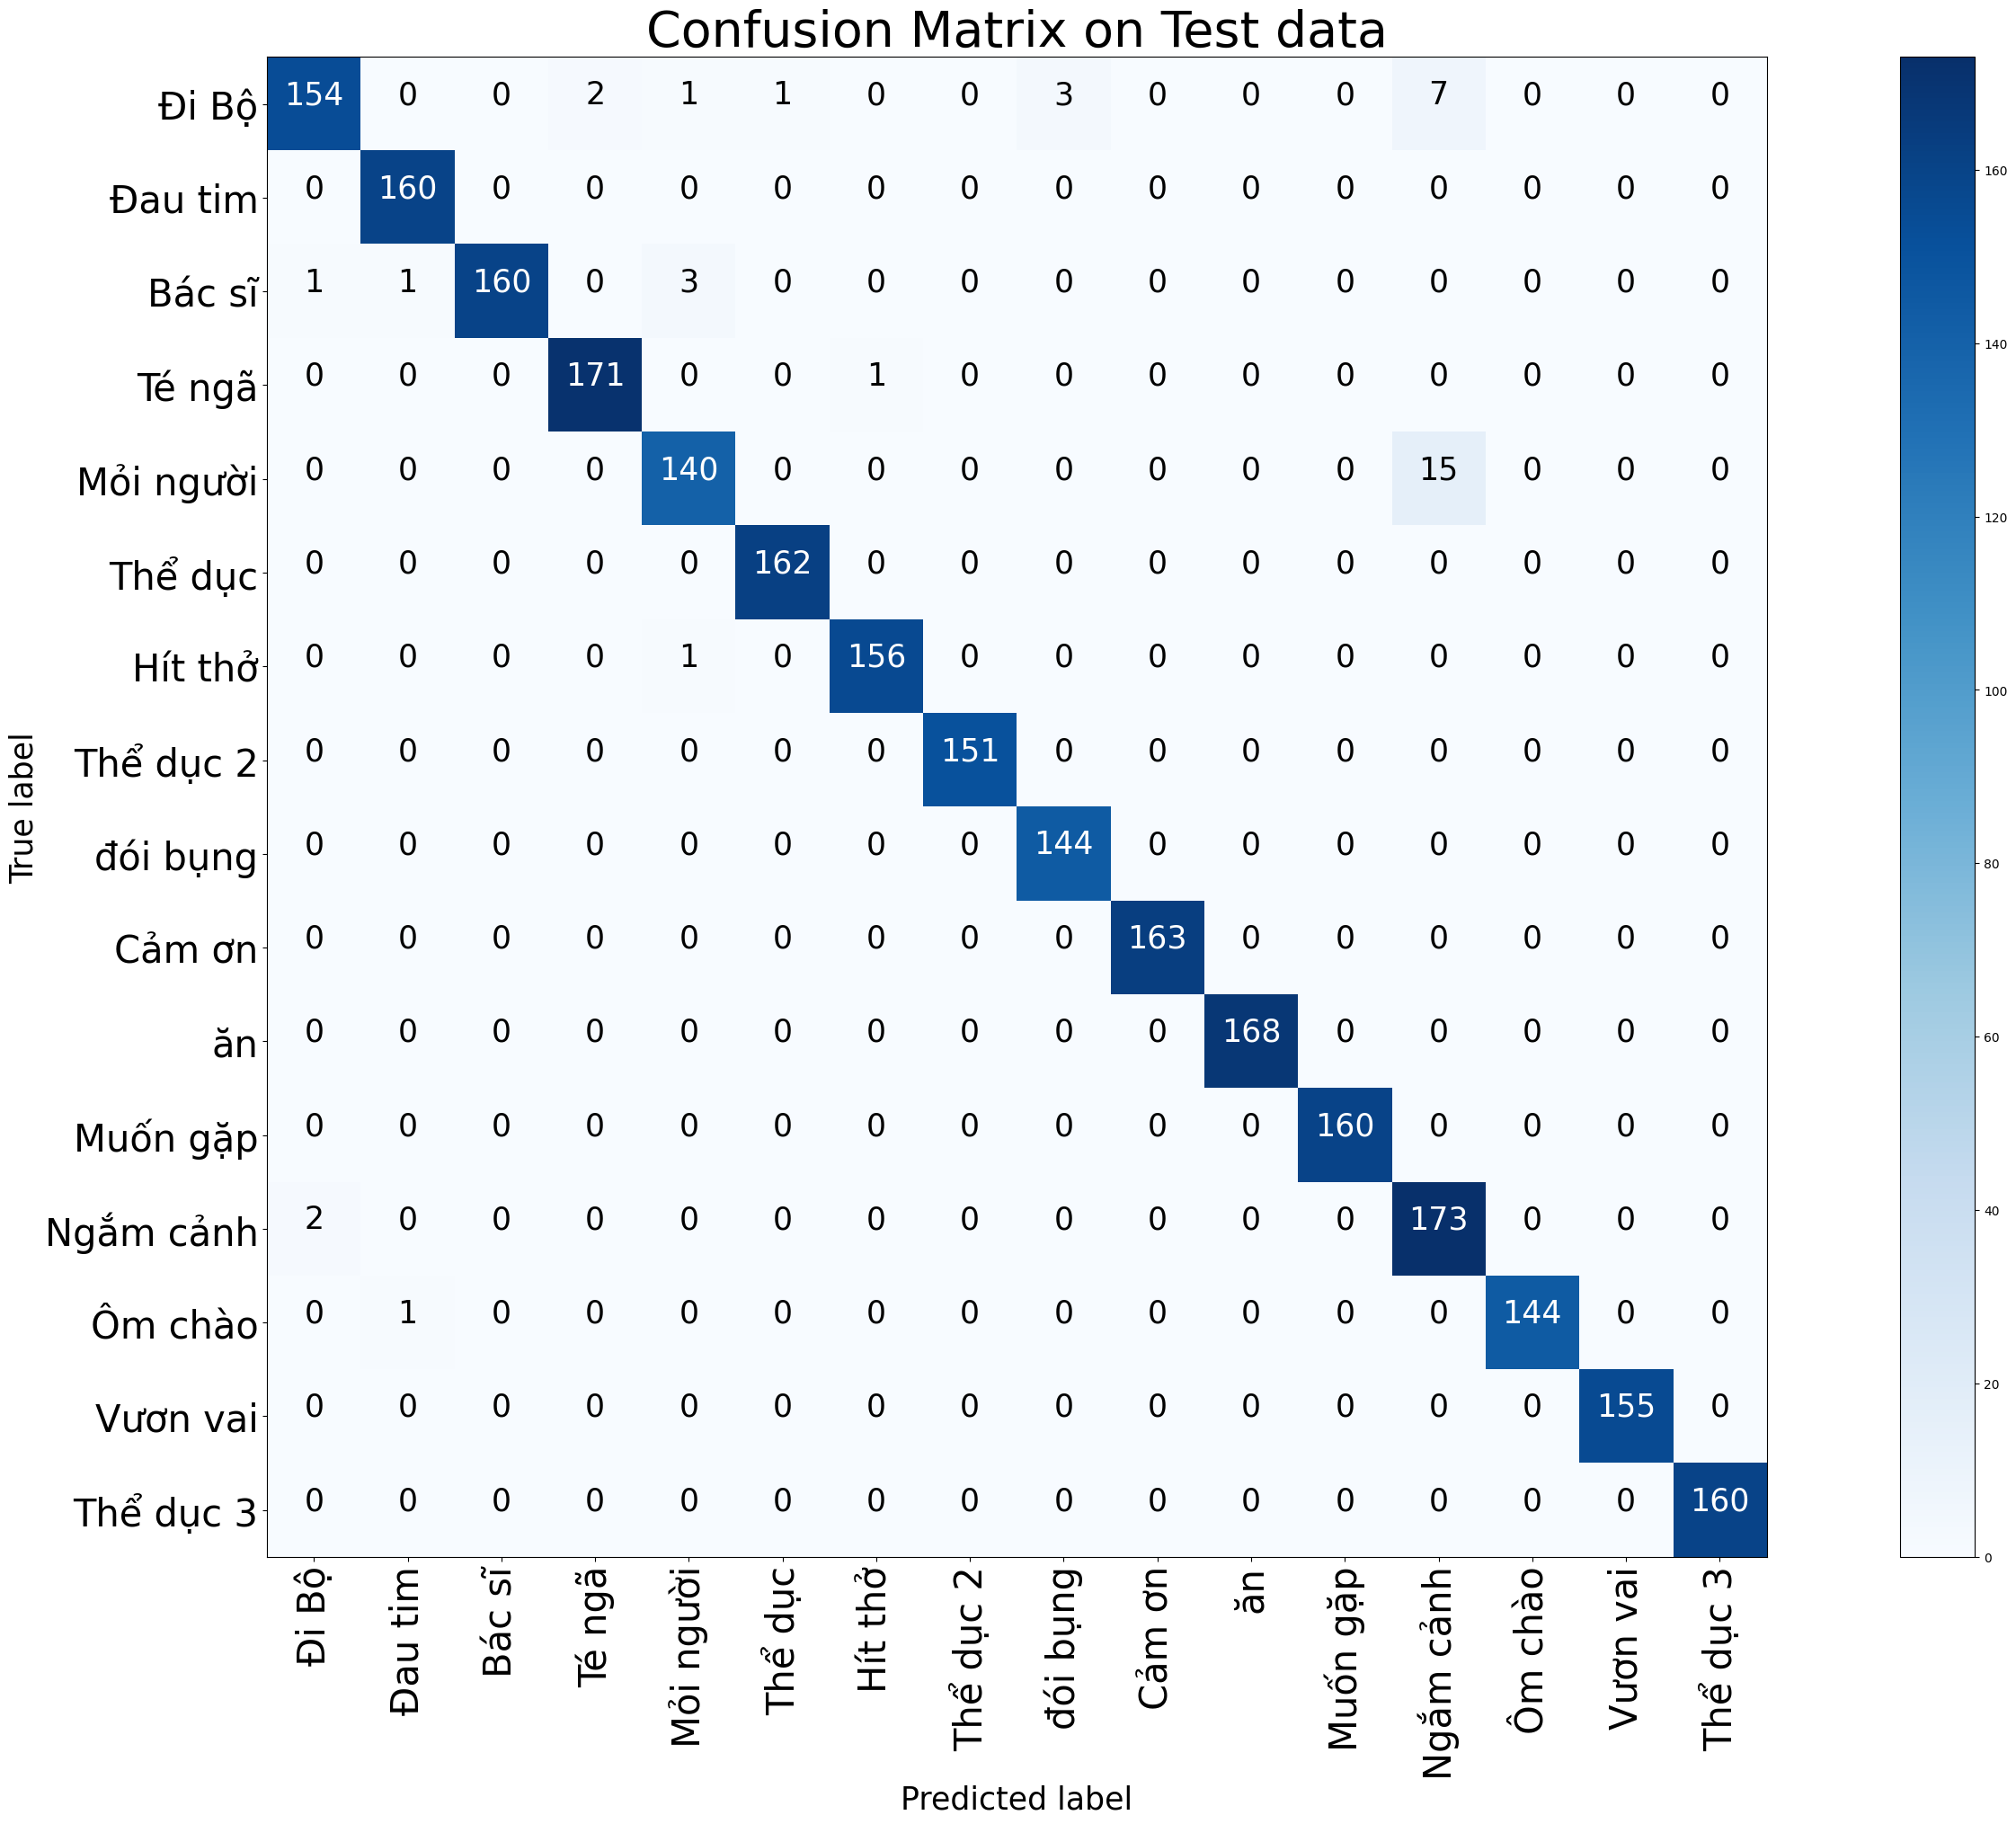

In [84]:
plt.figure(figsize=(30,20))
class_names = ['Đi Bộ', 'Đau tim', 'Bác sĩ','Té ngã', 'Mỏi người','Thể dục',
               'Hít thở', 'Thể dục 2', 'đói bụng', 'Cảm ơn', 'ăn', 'Muốn gặp',
               'Ngắm cảnh', 'Ôm chào', 'Vươn vai', 'Thể dục 3']
plot_confusion_matrix(cfm, classes=class_names, title='Confusion Matrix on Test data')
plt.show()

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pp, matrix_Y, test_size=0.2)

In [86]:
model = load_model('sign_language_18.h5')
Y_pred = model.predict(X_test)

80/80 [==============================] - 1s 4ms/step


In [87]:
print(Y_pred)

[[2.32e-06 1.77e-08 6.65e-06 ... 4.77e-07 1.98e-07 4.25e-06]
 [1.74e-05 1.41e-04 5.65e-06 ... 1.08e-07 1.02e-05 9.98e-01]
 [2.90e-05 8.16e-06 4.74e-06 ... 3.89e-05 8.46e-06 1.16e-07]
 ...
 [6.23e-06 1.73e-06 4.01e-07 ... 1.23e-05 3.77e-07 4.78e-07]
 [2.99e-06 8.46e-06 1.23e-07 ... 2.37e-04 5.03e-06 2.15e-05]
 [7.11e-04 3.12e-05 8.30e-04 ... 6.43e-05 9.97e-01 1.30e-04]]


In [88]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuGn):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 4.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [89]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

y_true = np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                    3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                    4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
                    5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
                    6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
                    7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
                    8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
                    9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
                    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                    11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
                    12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
                    13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
                    14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
                    15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
                    ])
y_pred = np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                    3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                    4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
                    5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
                    6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
                    7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
                    8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
                    9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
                    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                    11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
                    12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
                    13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
                    14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
                    15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
                    ])
cnf_matrix = confusion_matrix(y_true, y_pred)

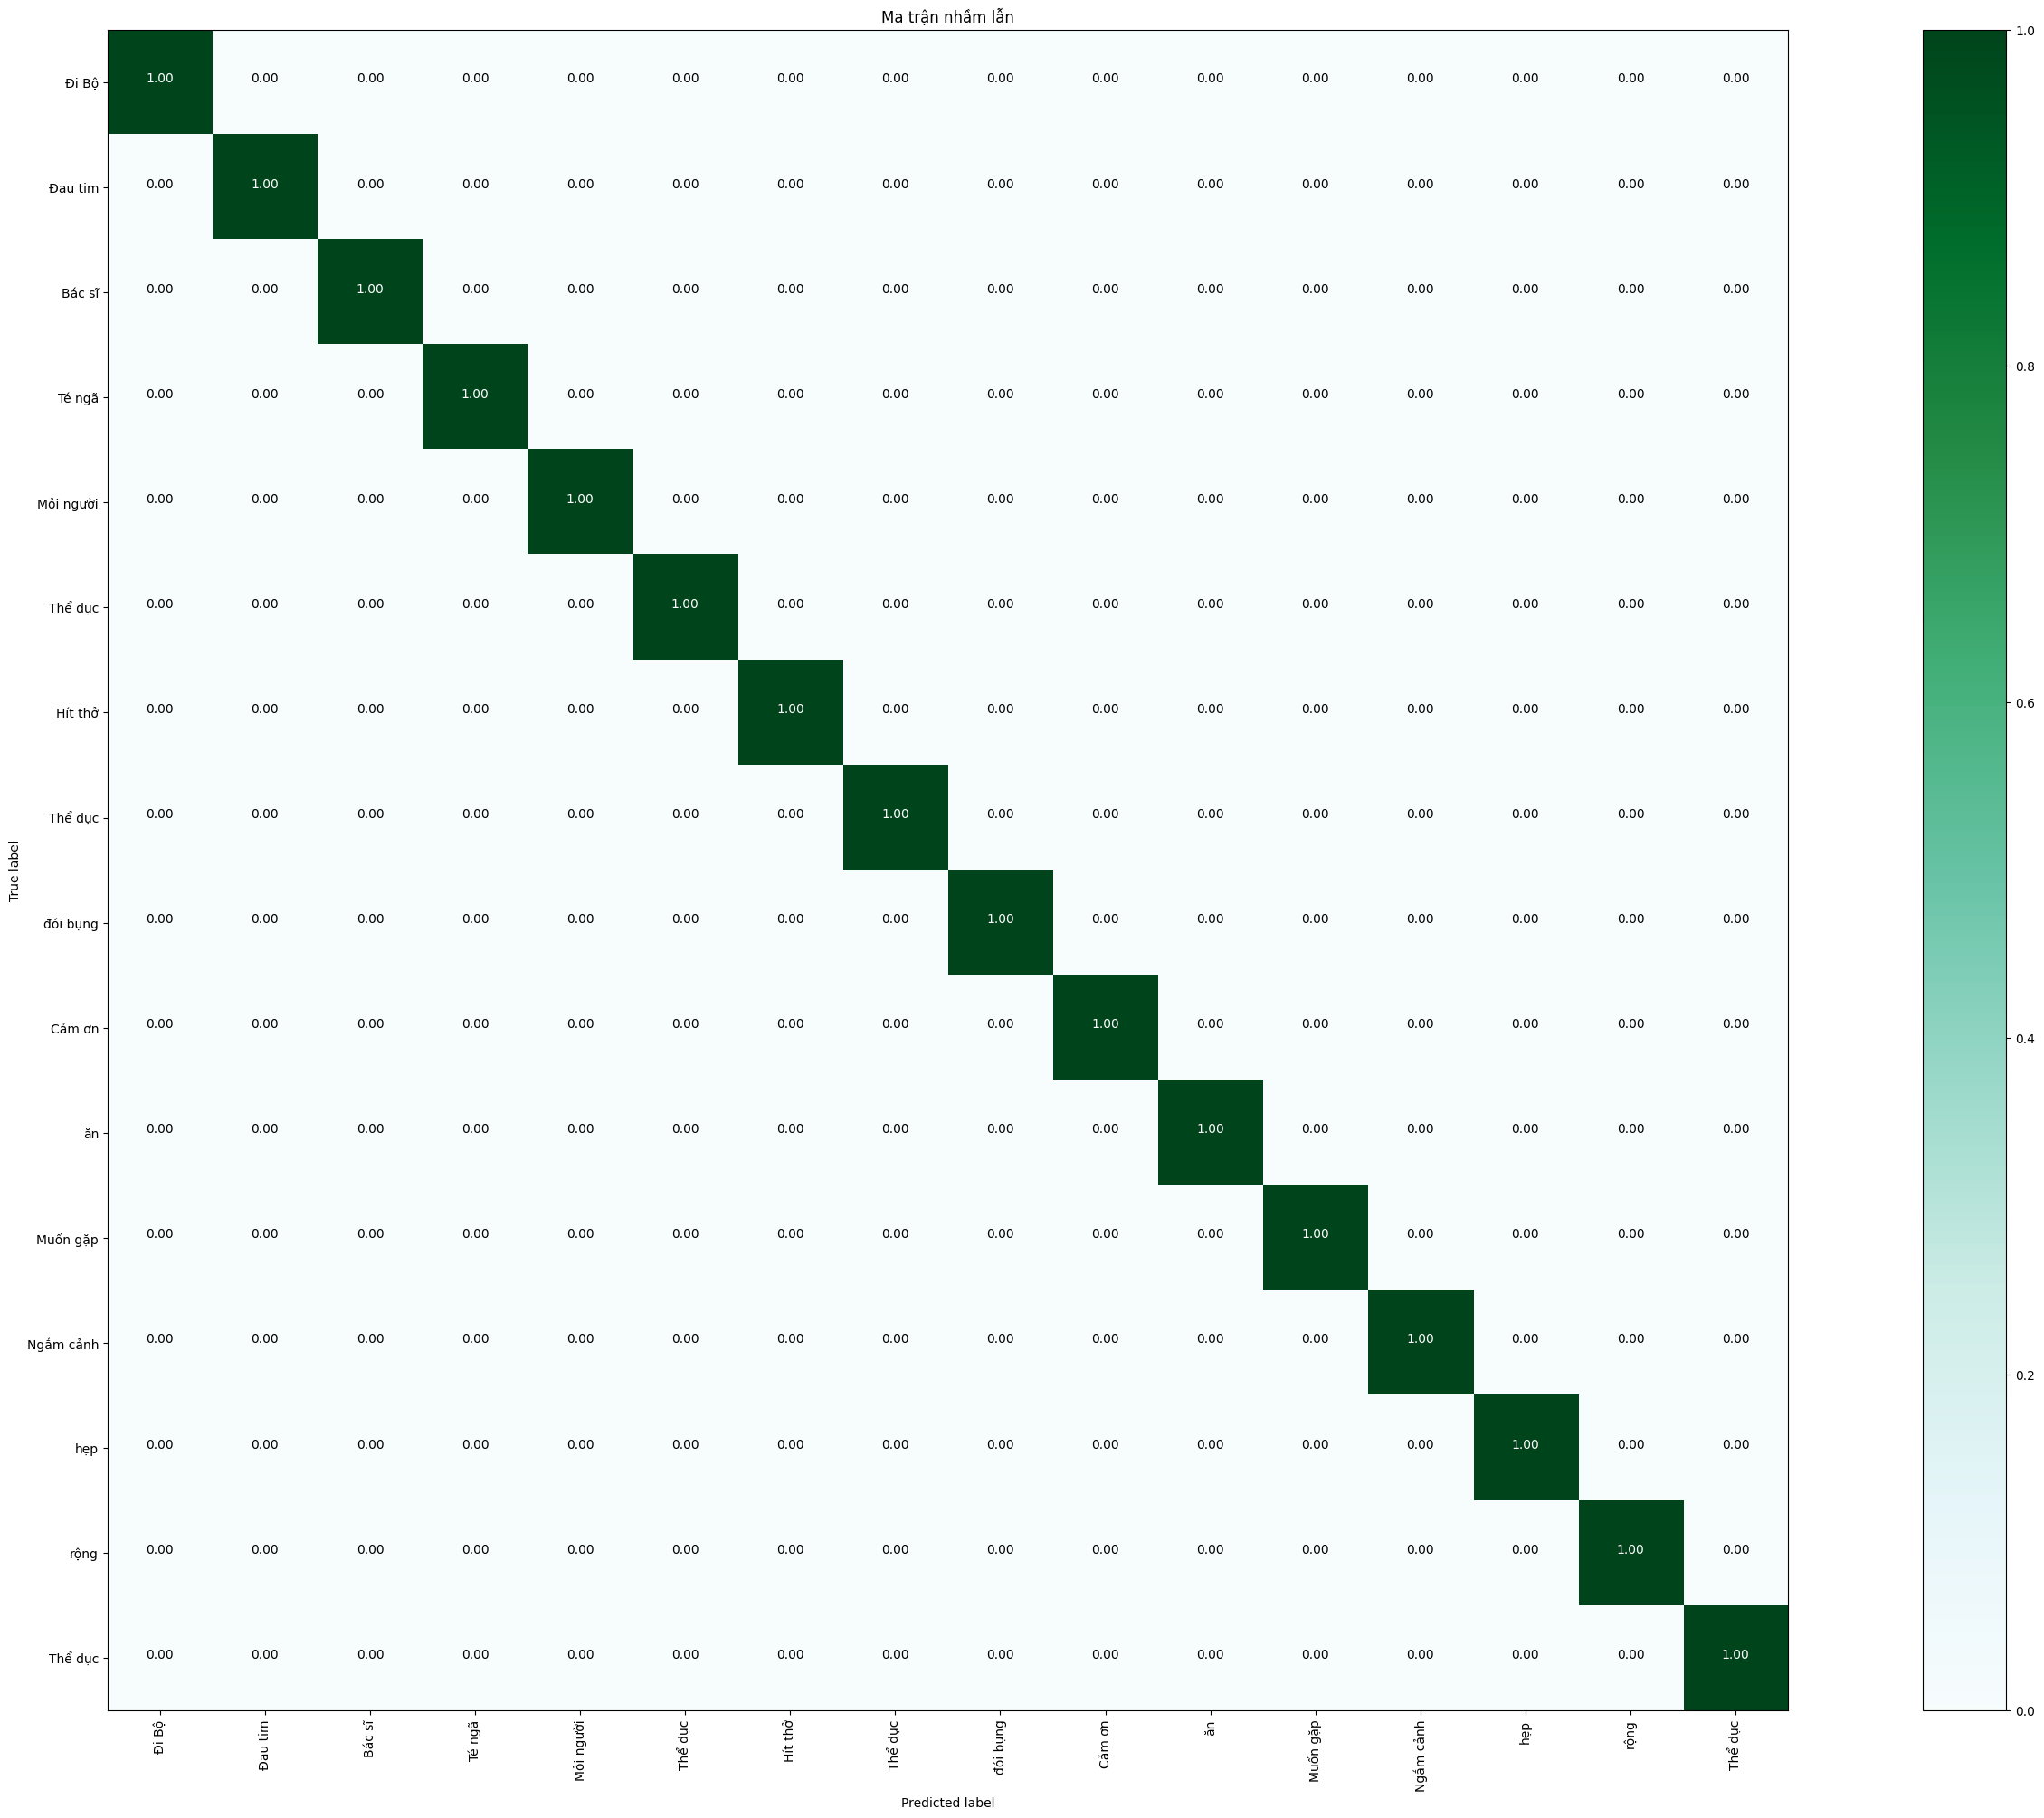

In [ ]:
class_names = ['Đi Bộ', 'Đau tim', 'Bác sĩ','Té ngã', 'Mỏi người','Thể dục',
               'Hít thở', 'Thể dục 2', 'đói bụng', 'Cảm ơn', 'ăn', 'Muốn gặp',
               'Ngắm cảnh', 'Ôm chào', 'Vươn vai', 'Thể dục 3']
#                0      1      2       3                4           5          6         7          8           9
plt.figure(figsize=(30,20))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Ma trận nhầm lẫn')

plt.show()